# Analyse du fichier logs
Fichier mis en forme à partir des logs bruts.
Format CSV contenant id_session,num_step_in_session,id_visitor,url,id_url,datetime,dwell_time
Ex:
177909,1,15157181111194496757,rha.revues.org/6885,26795,2017-01-01 00:00:00,14.0
177919,1,17419670761580487651,jsa.revues.org/2772,63653,2017-01-01 00:00:33,327.0
177925,1,324768533961010976,inventaire-rra.hypotheses.org/3661,95865,2017-01-01 00:00:45,1092.0

Auteur : Patrice Bellot, janvier 2021 (patrice.bellot@univ-amu.fr)

In [3]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [5]:
nom_fichier_log = "/Users/Patrice/Documents/Recherche/OpenEdition/ASO/Cometes/dwell_time_v4_10000.csv"
data = pd.read_csv(nom_fichier_log, dtype={'id_session':int, 'id_url':int})
data.shape

completeLogFile = "/Users/Patrice/Documents/Recherche/OpenEdition/ASO/Cometes/dwell_time_v4.csv"

# Découpage de fichier de logs en blocs de sessions (avec tailleBlocs lignes + lignes suivantes pour atteindre la fin d'une session)
tailleBloc = 50
tailleLogs = len(data)
nbBlocs = tailleLogs//tailleBloc
ligne_en_cours = 0
blocs = []
for i in range (nbBlocs+1):
    if tailleBloc*(i+1) < tailleLogs:
        derniere_ligne = tailleBloc*(i+1)
    else:
        derniere_ligne = tailleLogs
    blocEnCours = data.iloc[ligne_en_cours:derniere_ligne,]
    while derniere_ligne < tailleLogs and data['num_step_in_session'][derniere_ligne] != 1:
        blocEnCours = blocEnCours.append(data.iloc[derniere_ligne], ignore_index=True)
        derniere_ligne += 1
    blocs.append(blocEnCours)
    ligne_en_cours = derniere_ligne
print("nombre de blocs : ", len(blocs))

nombre de blocs :  200


## Statistiques générales sur les logs utilisés

longueur des sessions :  id_session
177909    1
177919    1
177925    1
177938    1
177942    9
         ..
195942    2
195945    1
195959    1
195963    1
195967    4
Name: num_step_in_session, Length: 3533, dtype: int64
count    3533.000000
mean        2.830173
std         6.790509
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       248.000000
Name: num_step_in_session, dtype: float64
nombre de sessions :  3533


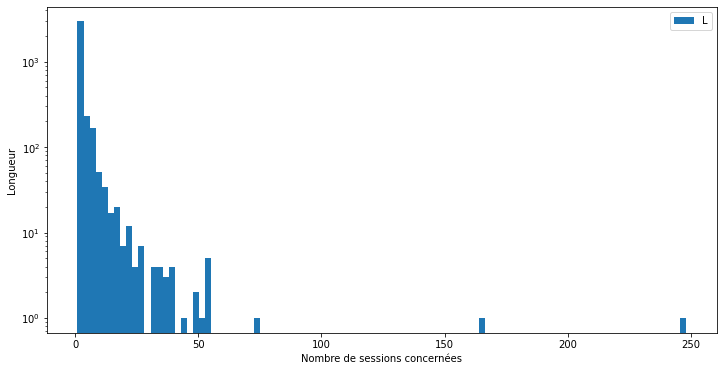

In [6]:
sessions = data.groupby('id_session').max()
print ("longueur des sessions : ", sessions['num_step_in_session'])
print (sessions['num_step_in_session'].describe())
print ("nombre de sessions : ", len(sessions))
plt.figure(figsize=(12,6))
plt.xlabel("Nombre de sessions concernées")
plt.ylabel("Longueur")
plt.hist(sessions['num_step_in_session'], bins=100, log=True)
plt.legend("Longueur des sessions en nombre de pages consultées")

In [7]:
compte_urls = Counter(data['id_url'])
print("Les URls les plus fréquentes sont : ", compte_urls.most_common(10))
print("Nombre d'URLs différentes : ", len(compte_urls))
URL_counts = sorted(compte_urls.values(), reverse=True)

Les URls les plus fréquentes sont :  [(42063, 128), (224690, 37), (124630, 32), (576, 31), (224874, 31), (42777, 29), (113894, 26), (196270, 25), (73888, 22), (220080, 22)]
Nombre d'URLs différentes :  6288


[128, 37, 32, 31, 31, 29, 26, 25, 22, 22, 20, 20, 19, 18, 18, 17, 16, 16, 15, 15, 14, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

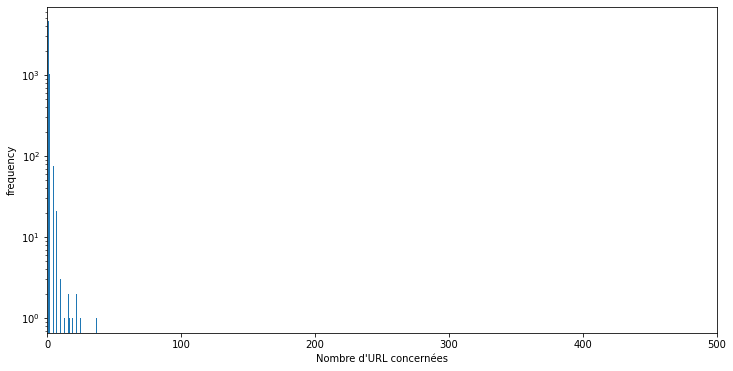

In [8]:
print(URL_counts)
plt.figure(figsize=(12,6))
plt.xlim(0,500)
plt.xlabel("Nombre d'URL concernées")
plt.ylabel('frequency')
g = plt.hist(URL_counts, bins=500, log=True)

## Construction de Graphyp
### Construction d'un graphe des sessions et estimation de N
Le poids des noeuds correspond au nombre de fois que l'URL a été consultée, ce nombre estime N.
Pour une session donnée, on peut voir l'évolution de N.
N devrait être estimé au fur et à mesure du fichier log pour refléter le N réel au moment où l'utilisateur a consulté le document.
Cela pose un problème de démarrage à froid : les logs ne sont pas complets, ils ne partent pas à t0 du site Web.
En conséquence, on peut estimer, si les logs concernent une courte période, qu'il vaut mieux estimer les N a posteriori (à la fin de la construction du graphe).
Ils reflètent donc les valeurs de N non pas au moment de la recherche mais à la date de fin des logs analysés.

In [9]:
graph = nx.Graph()
# parcours ligne à ligne du fichier log et création d'une arête (id_url_précédente, id_url) chaque fois que num_step est différent de 1 (session de longueur min = 2)
nombre_sessions_graphe = 0
for ind in data.index:
    url_lue = data['id_url'][ind]
    if data['num_step_in_session'][ind] == 2:
        nombre_sessions_graphe += 1
    if data['num_step_in_session'][ind] > 1:
        #print("ajout du lien ", url_precedente, " vers ", url_lue)
        if url_precedente not in graph:
            graph.add_node(url_precedente)
            graph.nodes[url_precedente]['nb'] = 1
            N_precedente = 1
            #print("ajout du noeud : ", url_precedente, " avec att : ", graph.nodes[url_precedente], graph.nodes[url_precedente]['nb'])
        else:
            weight = graph.nodes[url_precedente]['nb'] + 1
            graph.nodes[url_precedente]['nb'] = weight
            N_precedente = weight
        if url_lue not in graph:
            graph.add_node(url_lue)
            graph.nodes[url_lue]['nb'] = 1
            N_lue = 1
            #print("ajout du noeud : ", url_lue, " avec att : ", graph.nodes[url_lue], graph.nodes[url_lue]['nb'])
        else:
            weight = graph.nodes[url_lue]['nb'] + 1
            graph.nodes[url_lue]['nb'] = weight
            N_lue = weight
        graph.add_edge(url_precedente, url_lue)
    url_precedente = url_lue
#list(nx.connected_components(graph))
print ("nombre de noeuds : ", graph.number_of_nodes())
print ("nombre d'arêtes : ", graph.number_of_edges())
print ("nombre de sessions dans le graphe (longueur > 1) : ", nombre_sessions_graphe)

nombre de noeuds :  4704
nombre d'arêtes :  4550
nombre de sessions dans le graphe (longueur > 1) :  1532


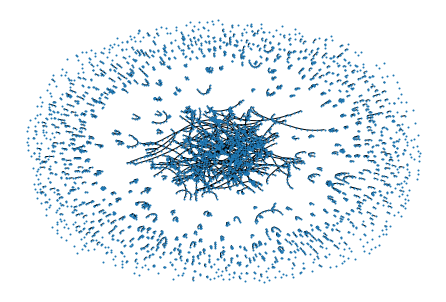

In [10]:
# Affichage du graphe
options = { 'node_size' : 1}
nx.draw(graph, **options)

Text(0.5, 1.0, 'Evolution de K dans les sessions de longeur comprise entre 10 et 50')

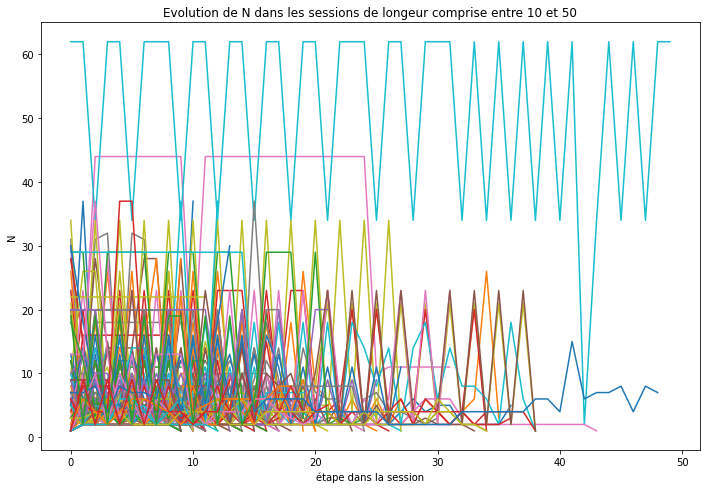

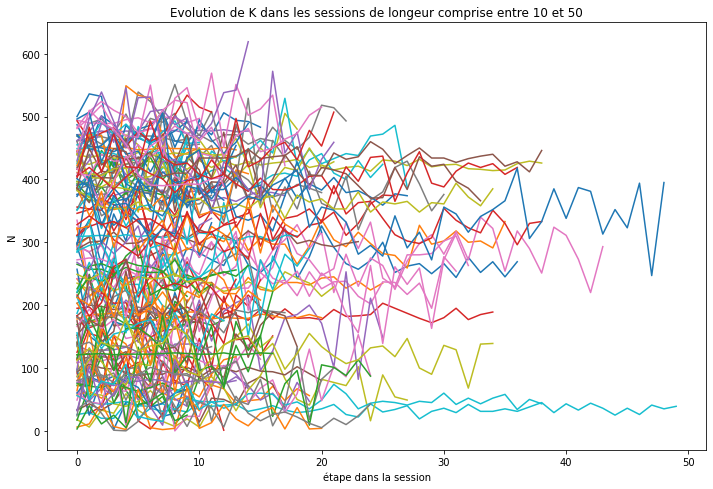

In [83]:
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(30),cm_to_inch(20)))
for ind in indice_N_sessions:
    if len(ind) >= 10 and len(ind) <= 50:
        plt.plot(ind)
        #print("longueur session : ", len(ind))
plt.xlabel("étape dans la session")
plt.ylabel("N")
plt.title("Evolution de N dans les sessions de longeur comprise entre 10 et 50")

plt.figure(figsize=(cm_to_inch(30),cm_to_inch(20)))
for ind in indice_K_sessions:
    if len(ind) >= 10 and len(ind) <= 50:
        plt.plot(ind)
        #print("longueur session : ", len(ind))
plt.xlabel("étape dans la session")
plt.ylabel("N")
plt.title("Evolution de K dans les sessions de longeur comprise entre 10 et 50")

# =======================================================================================
# =======================================================================================

In [173]:
# Création d'un tableau à deux dimensions à partir des logs où chaque ligne correspond à une session d'un utilisateur
# Cette fonction est appelée pour chaque bloc de sessions
# Ligne : liste des articles consultés (URLs)
def creeTableauSessions(logs):
    nombre_session_logs = 0
    sessions = []
    for ind in logs.index:
        url_lue = logs['id_url'][ind]
        if data['num_step_in_session'][ind] == 1: # début d'une nouvelle session
            nombre_session_logs += 1
            ligne = [url_lue]
            sessions.append(ligne)
        if data['num_step_in_session'][ind] > 1: # on continue la session en cours
            #print("ajout du lien ", url_precedente, " vers ", url_lue)
            ligne.append(url_precedente)
        url_precedente = url_lue
    return sessions

# Estimation de N et K pour un bloc de sessions passé en paramètre en même temps que le numéro du bloc
# pour chaque session, K est déjà estimé : il s'agit du nombre d'articles lus dans la session :
def estimationNK(sessions, indiceBloc):
    global K
    for ind in sessions:
        K[indiceBloc].append(len(ind))
    #print(K)
    if indiceBloc < 50:
        plt.figure(figsize=(12,5))
        plt.ylabel("K")
        plt.xlabel("Session nb")
        plt.plot(K[indiceBloc])

    KMean[indiceBloc] = np.mean(K[indiceBloc])
    #print("valeur moyenne de K : ", np.mean(K[indiceBloc]), " valeur max :", np.max(K[indiceBloc]), " nombre sessions : ", len(K[indiceBloc]) )
    #print("valeur médiane de K : ", np.median(K[indiceBloc]))

    global N
    N[indiceBloc] = np.zeros(np.max(K[indiceBloc])+1)
    for i in range(len(sessions)):
        q

    NMean[indiceBloc] = np.mean(N[indiceBloc])
    #print("valeur moyenne de N : ", np.mean(N[indiceBloc]))

<ipython-input-173-bce5df0780e5>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


Moyennes de N :  [2.3, 3.8, 2.5, 2.5, 2.727272727272727, 1.5, 3.8, 0.9090909090909091, 4.5, 3.5714285714285716, 0.21212121212121213, 1.8333333333333333, 3.5714285714285716, 3.5555555555555554, 2.5, 3.0, 0.8333333333333334, 3.4, 3.4, 2.5, 2.2, 3.4285714285714284, 2.625, 4.5, 2.1818181818181817, 2.3, 2.5, 1.9, 3.6, 1.1, 2.5, 2.5, 1.8, 0.85, 2.7, 2.2, 1.2142857142857142, 2.888888888888889, 1.6153846153846154, 2.5, 2.6666666666666665, 2.3, 2.2, 3.0, 1.25, 2.3, 3.8, 0.9, 2.2, 0.9090909090909091, 2.3, 3.2, 1.0, 2.3, 1.6153846153846154, 2.3, 2.3, 3.25, 4.285714285714286, 2.5, 2.2, 0.8666666666666667, 1.5454545454545454, 2.7, 1.7, 2.3, 4.166666666666667, 3.7142857142857144, 2.3, 2.3, 0.5909090909090909, 0.3103448275862069, 1.8181818181818181, 1.5, 2.272727272727273, 1.2222222222222223, 0.8947368421052632, 0.64, 1.1764705882352942, 0.631578947368421, 3.2, 3.6, 2.8157894736842106, 1.6842105263157894, 1.7083333333333333, 2.8, 0.9, 1.9, 2.1, 1.1538461538461537, 0.48148148148148145, 3.1111111111111

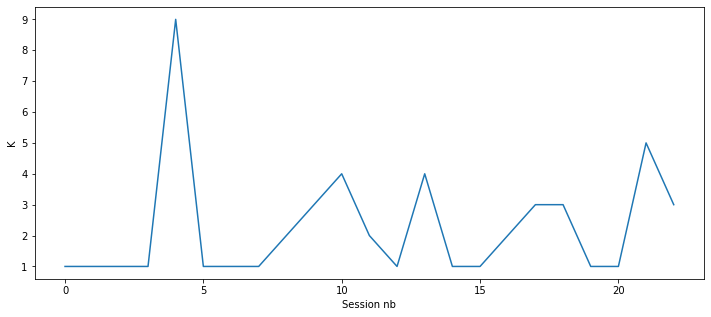

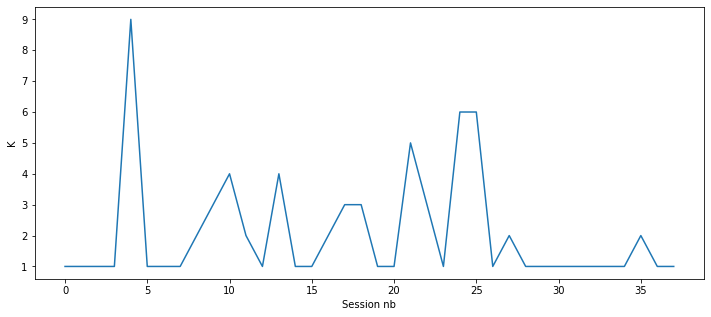

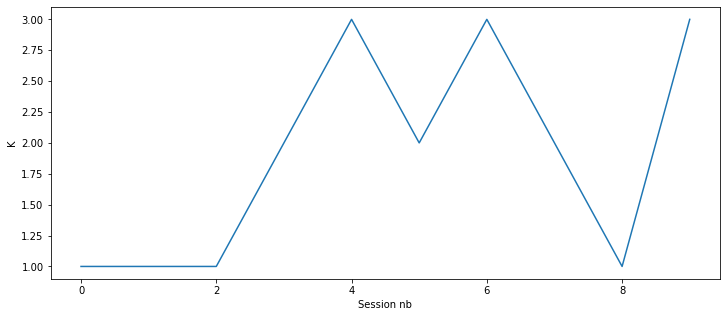

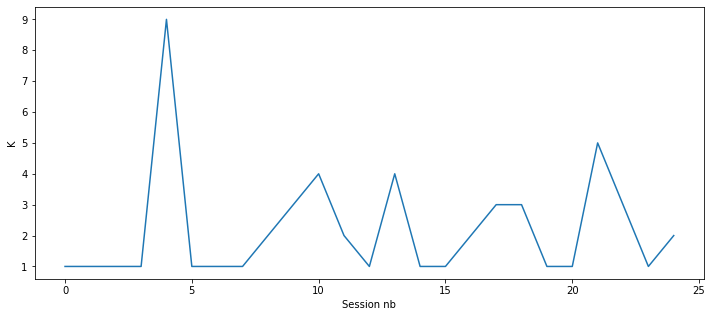

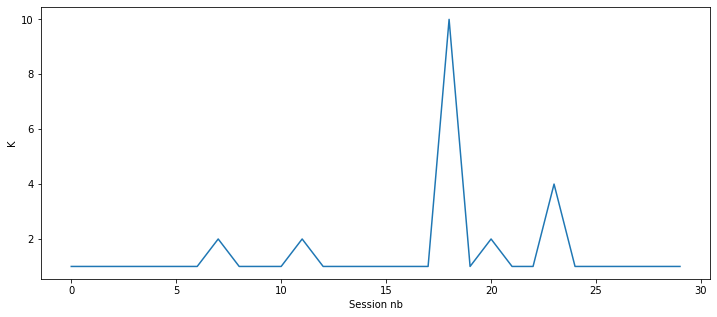

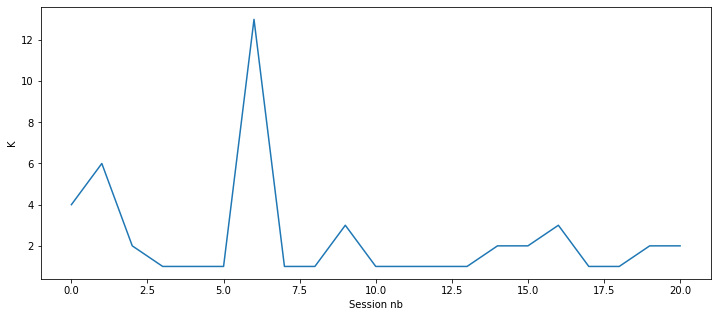

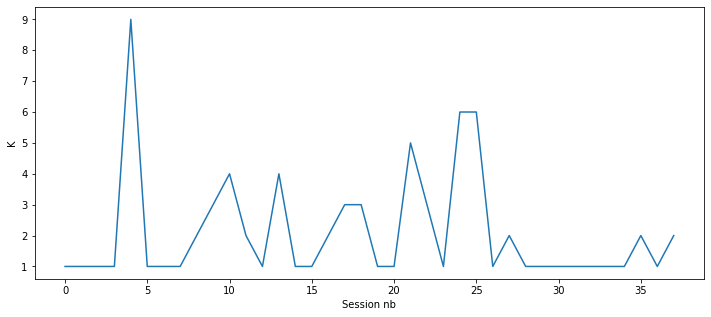

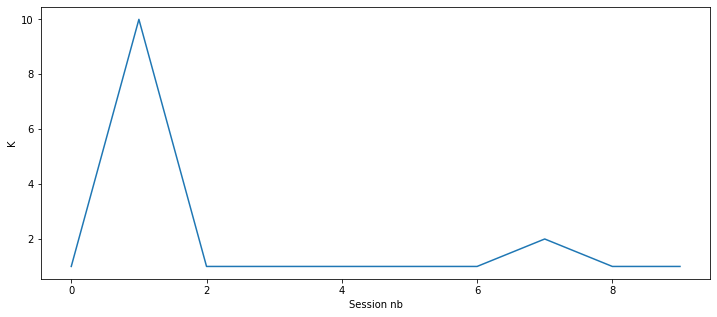

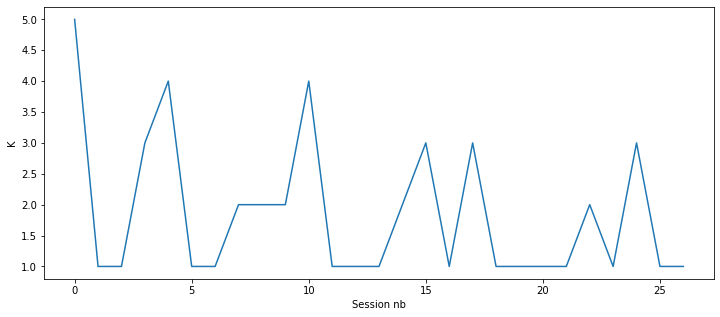

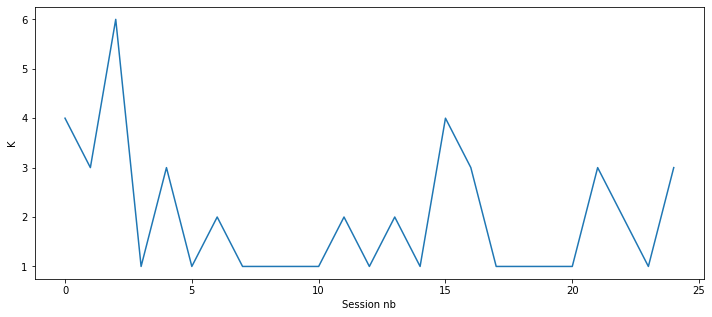

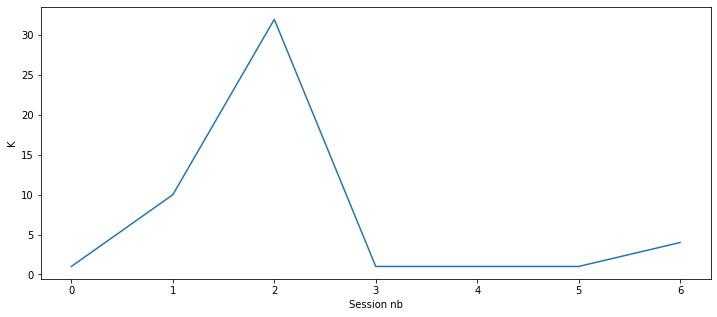

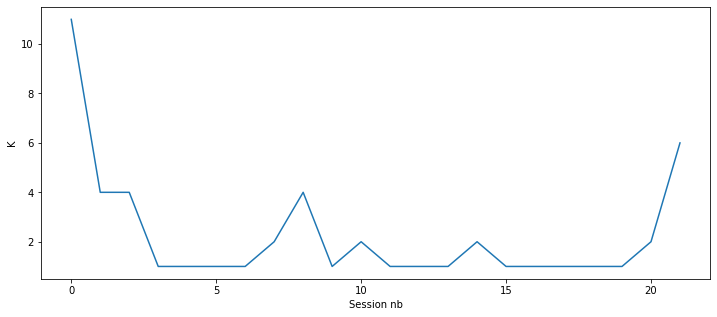

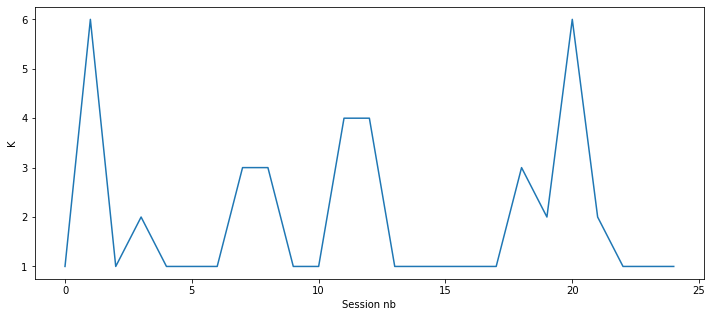

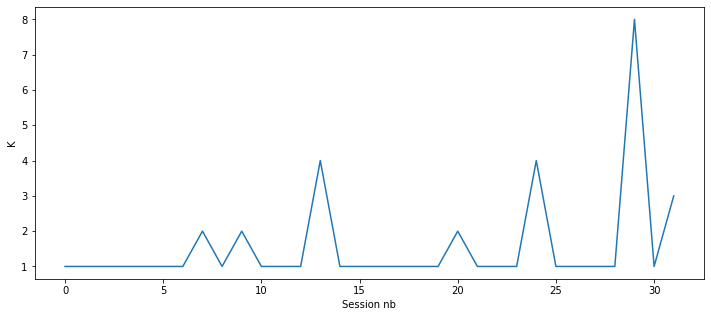

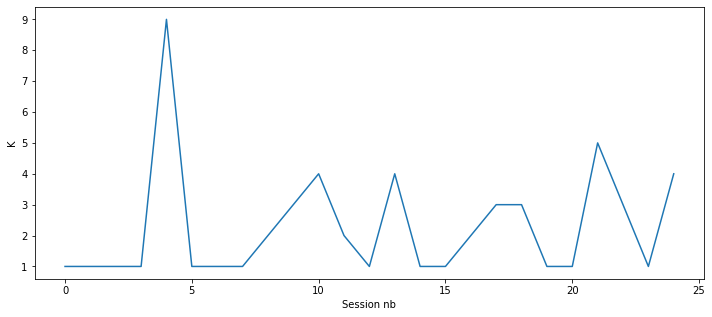

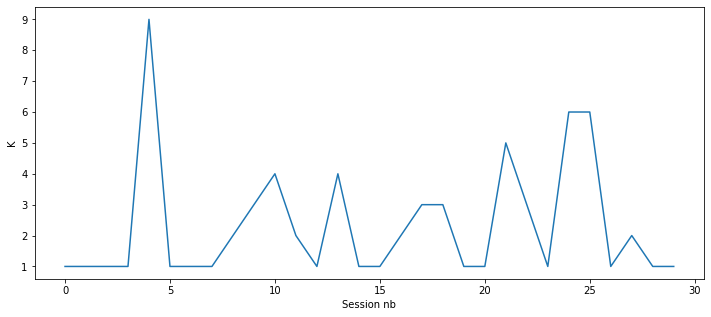

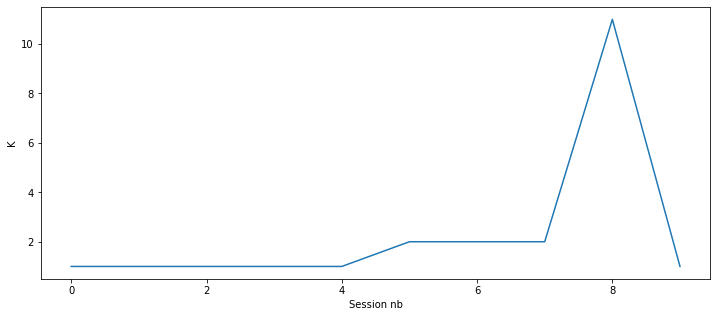

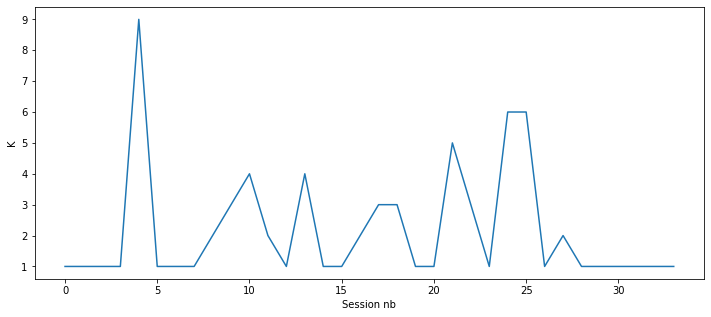

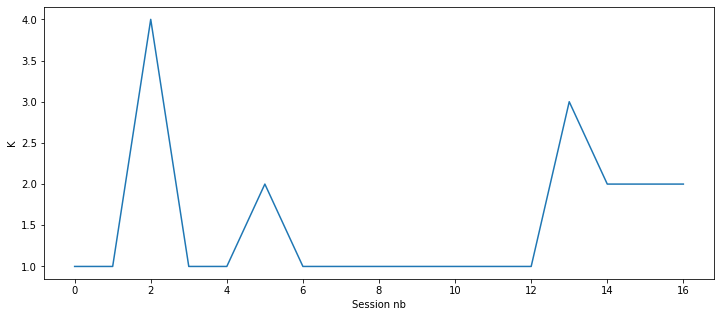

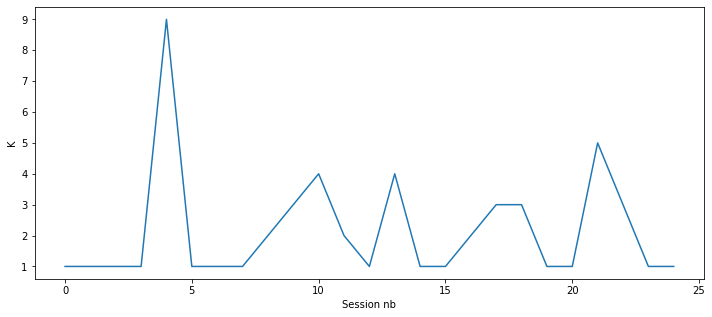

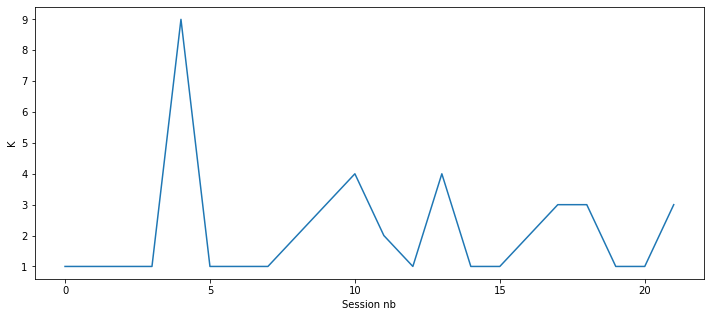

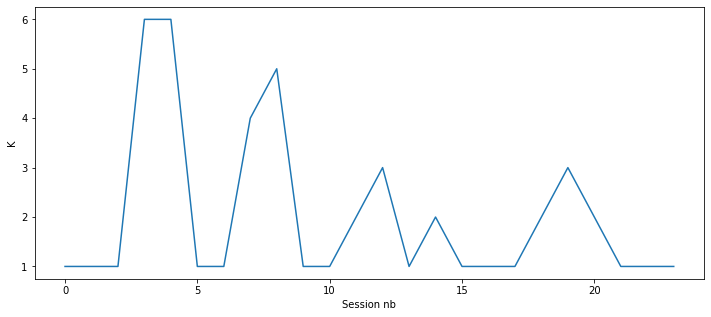

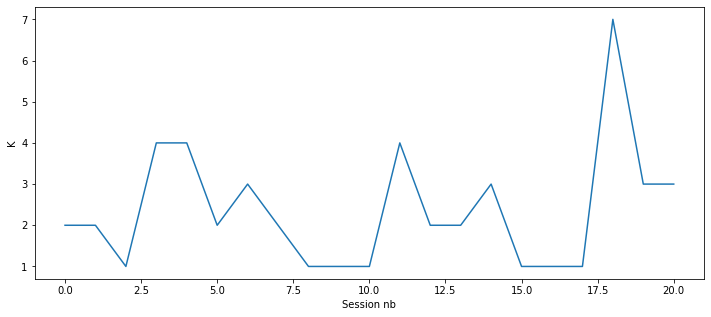

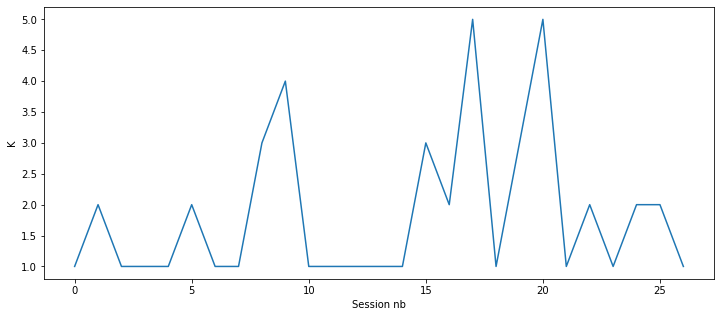

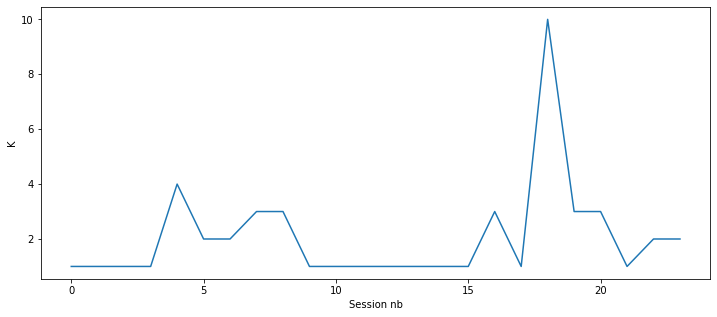

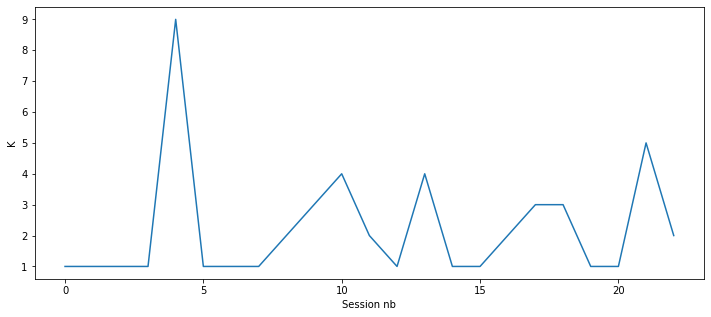

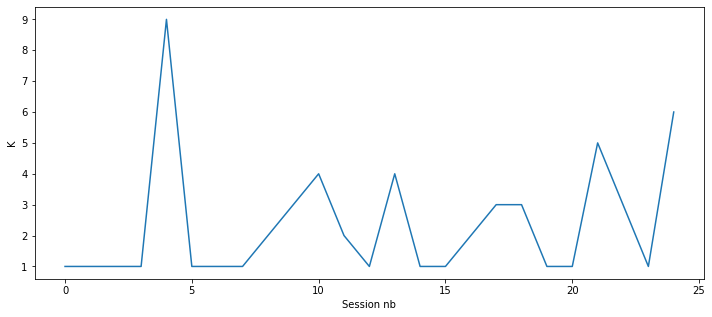

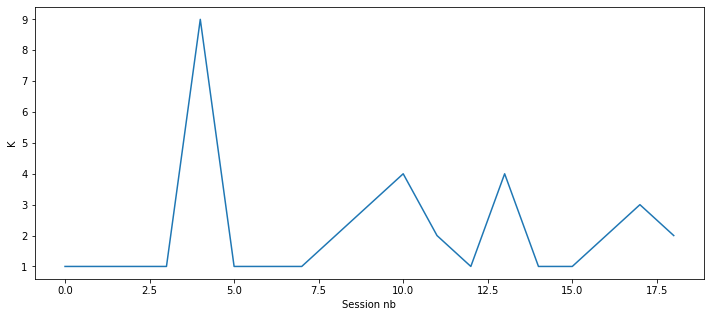

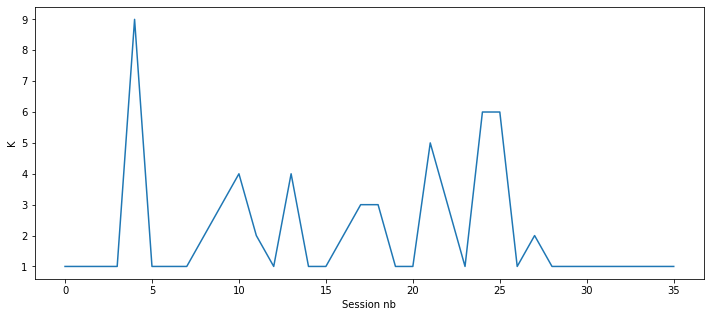

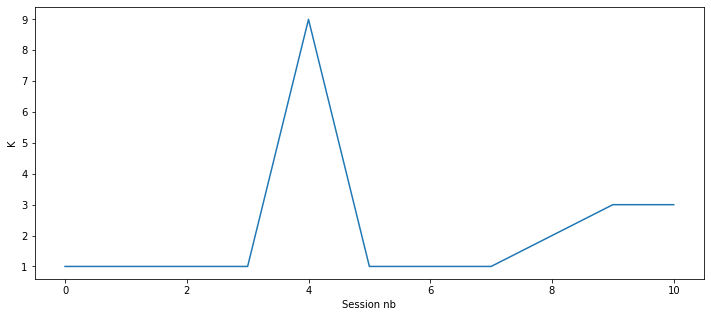

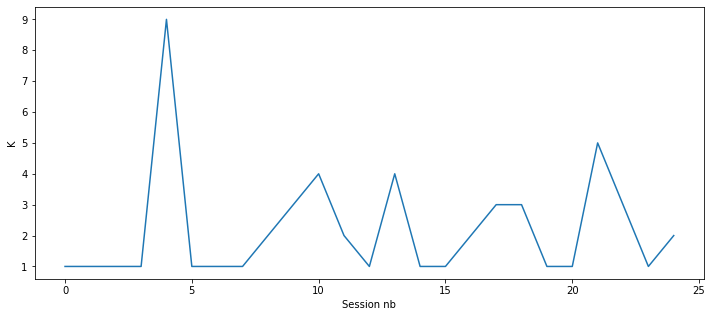

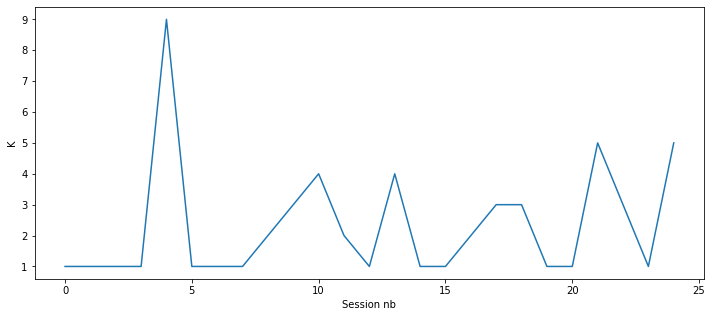

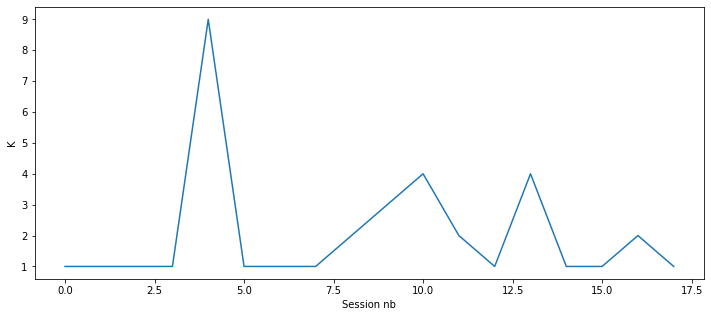

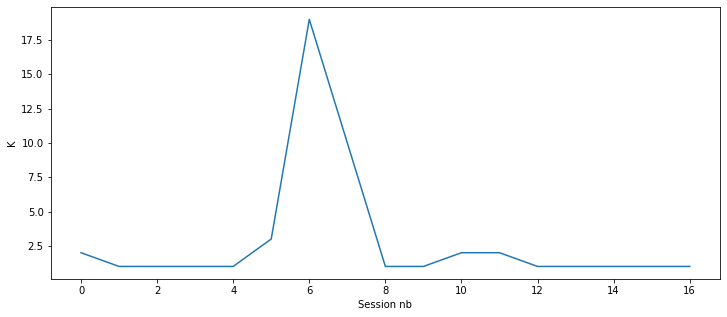

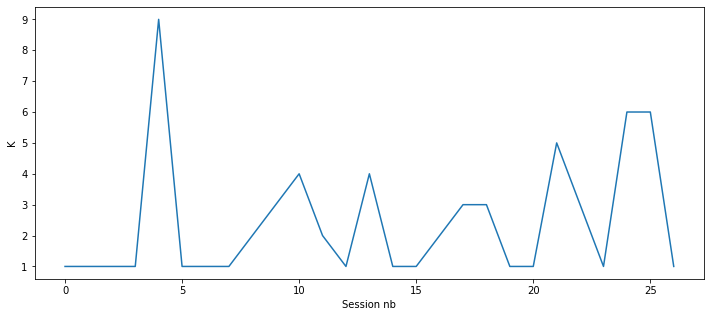

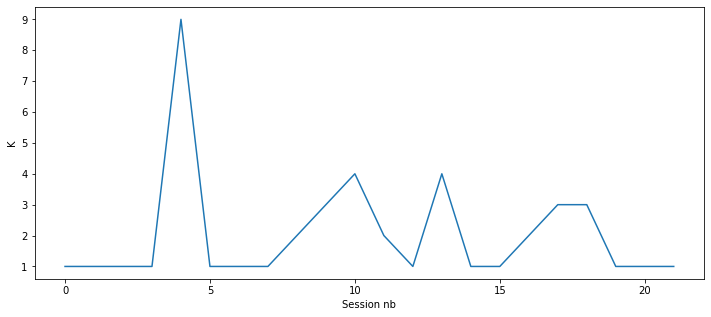

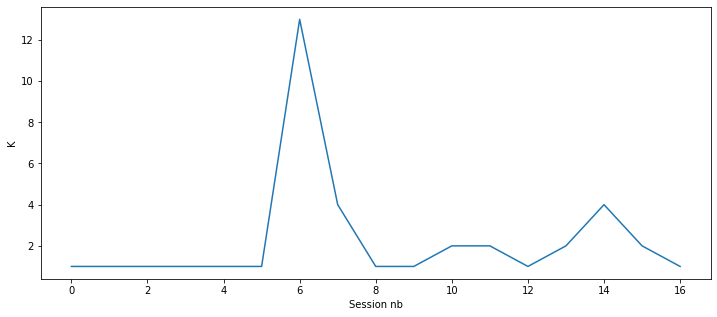

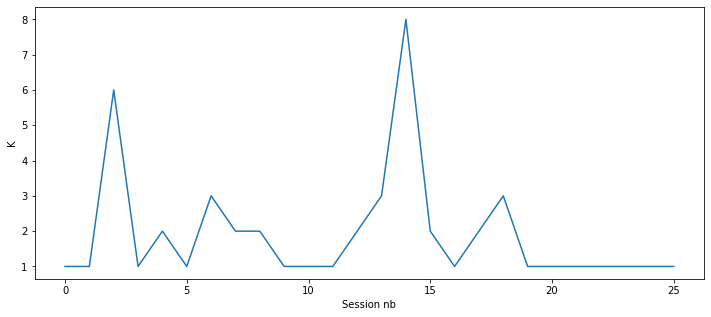

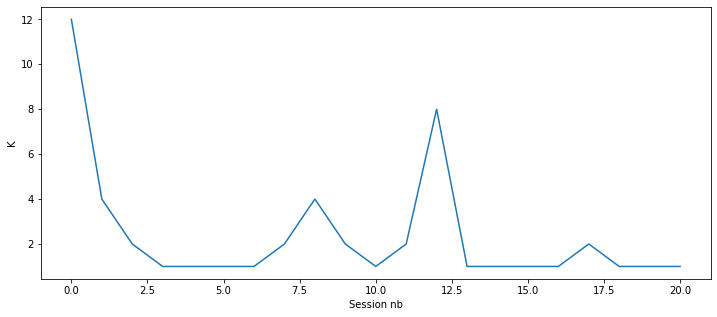

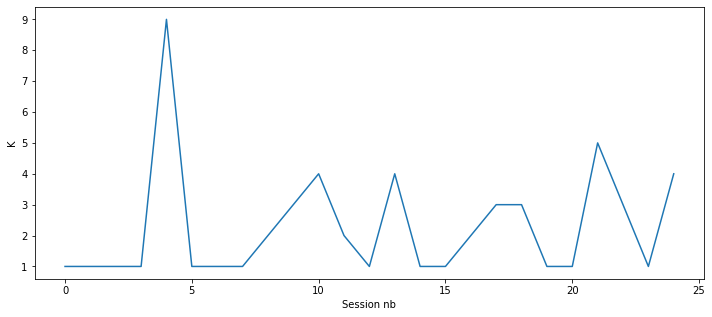

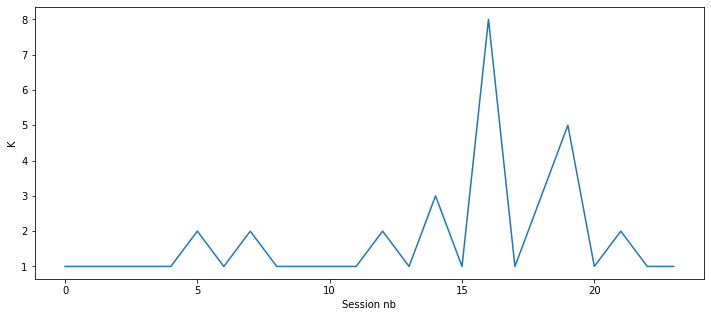

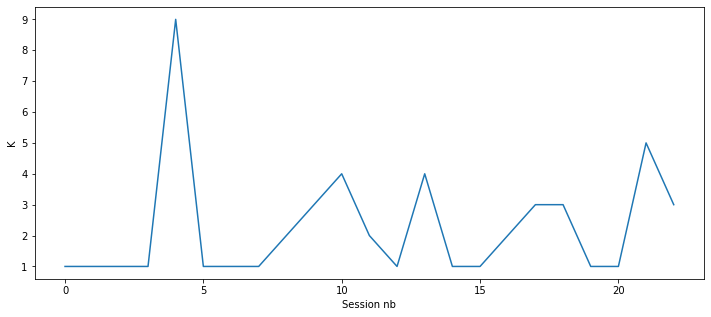

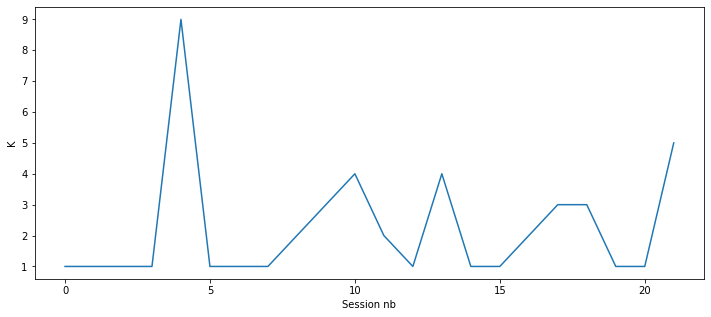

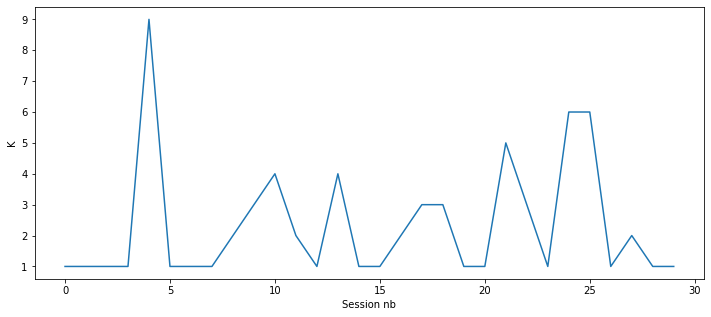

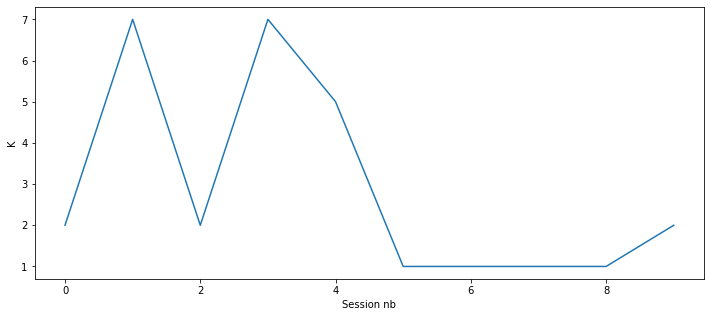

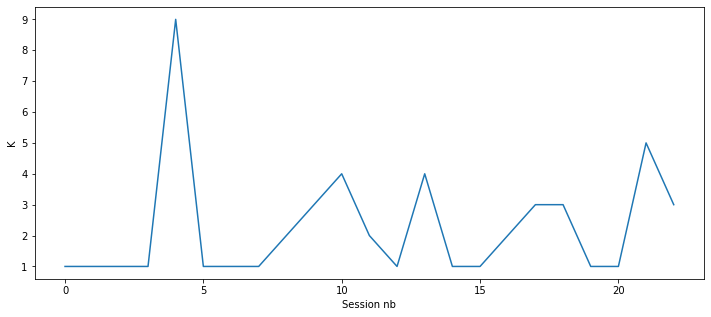

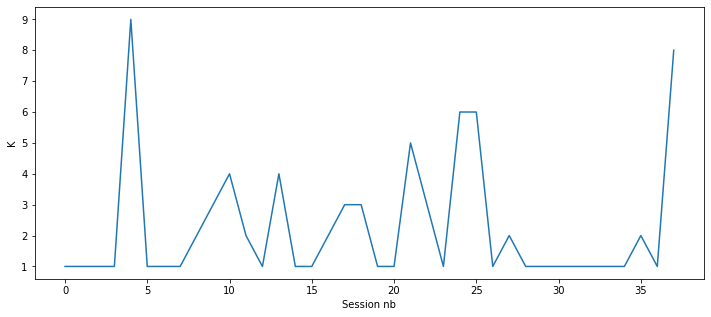

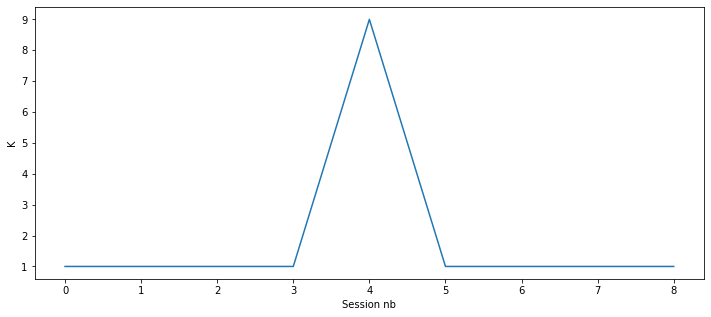

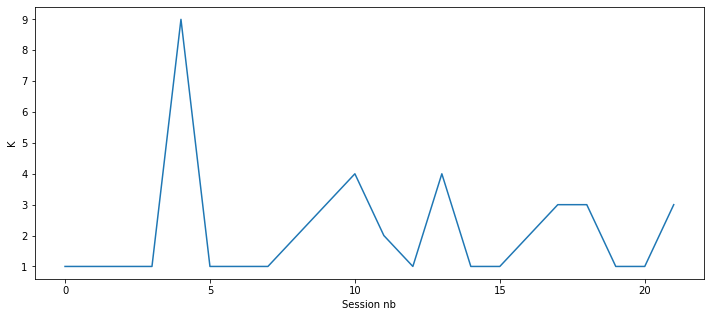

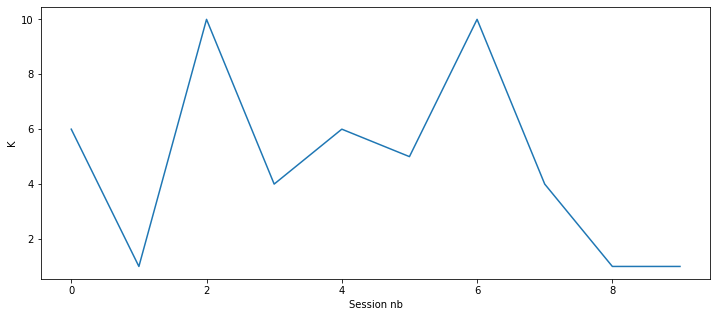

In [175]:
#Calcul de l'ensemble des N et K pour les différents blocs de session
K = [[] for i in range(len(blocs))]
N = [[] for i in range(len(blocs))]
NMean = [0 for i in range(len(blocs))]
KMean = [0 for i in range(len(blocs))]
indiceBloc=0
for numBloc in blocs:
    sessions = creeTableauSessions(numBloc)
    estimationNK(sessions, indiceBloc)
    indiceBloc +=1

print("Moyennes de N : ", NMean)
print("Moyennes de K : ", KMean)

<ipython-input-176-2ddb740583e7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


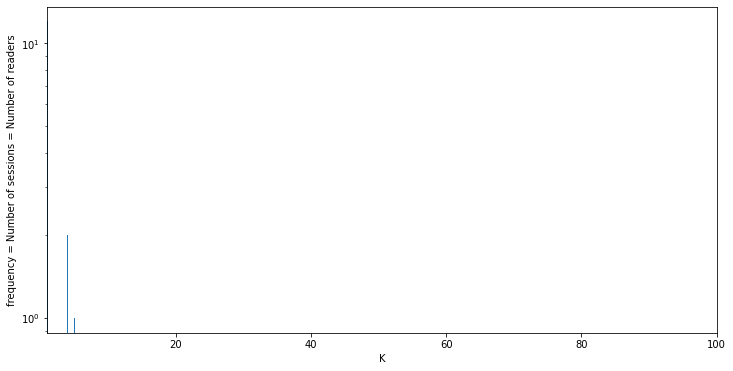

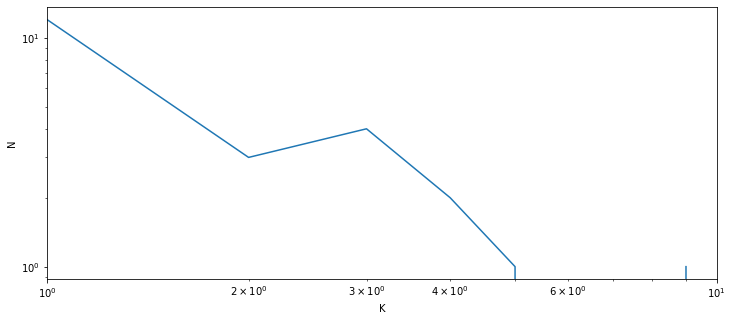

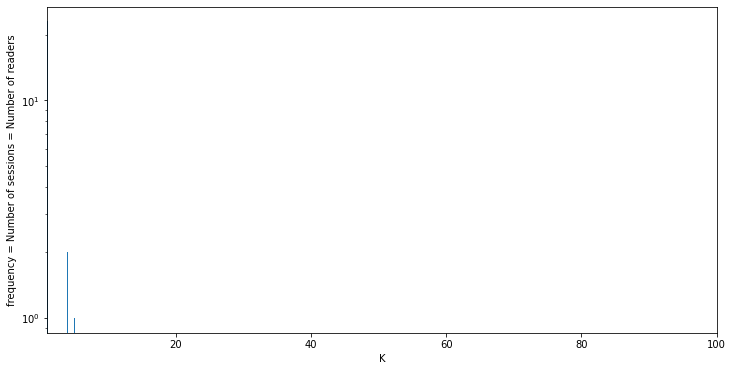

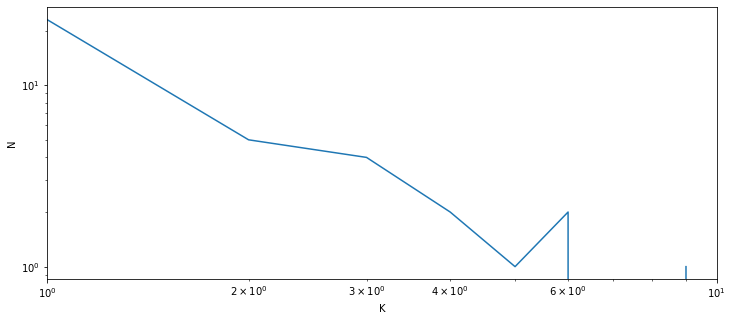

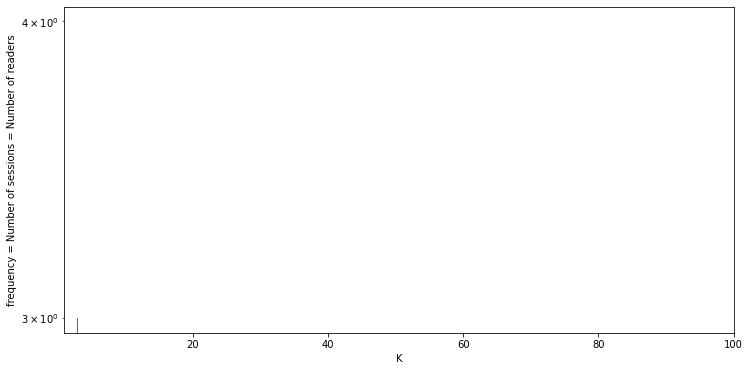

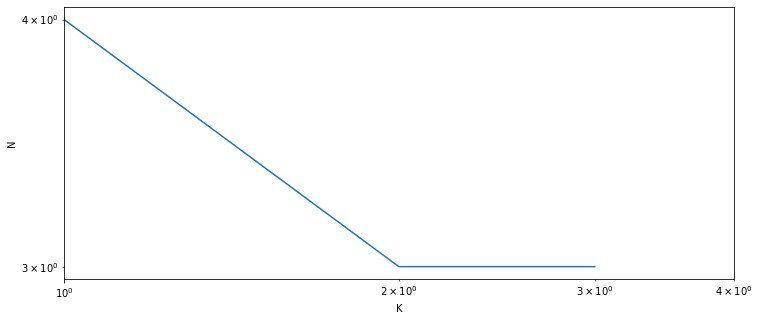

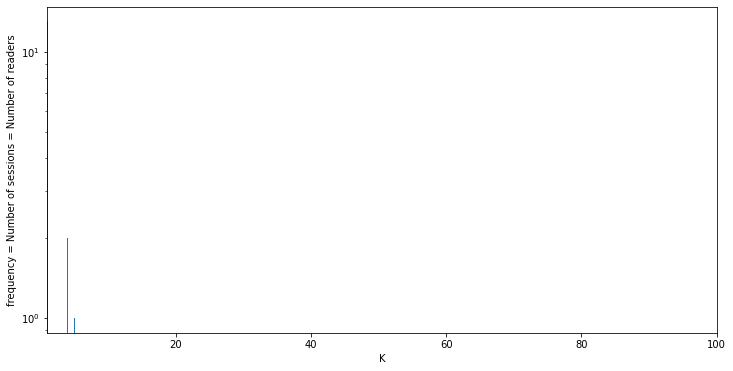

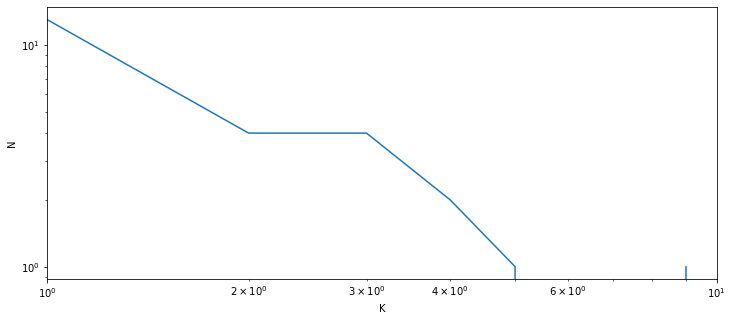

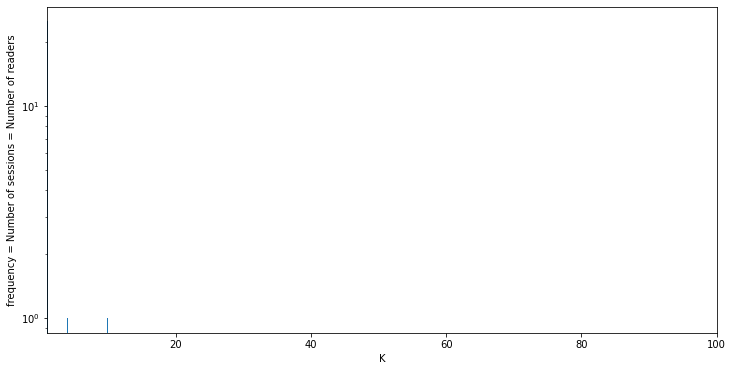

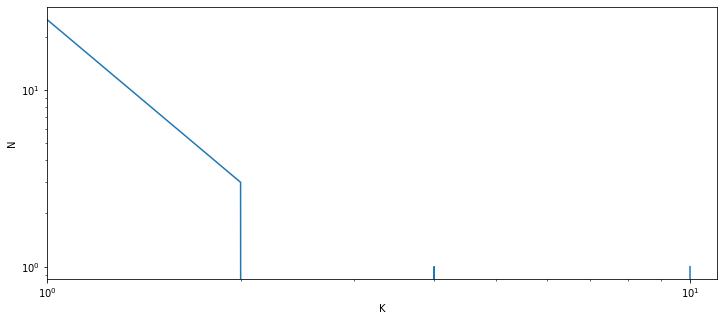

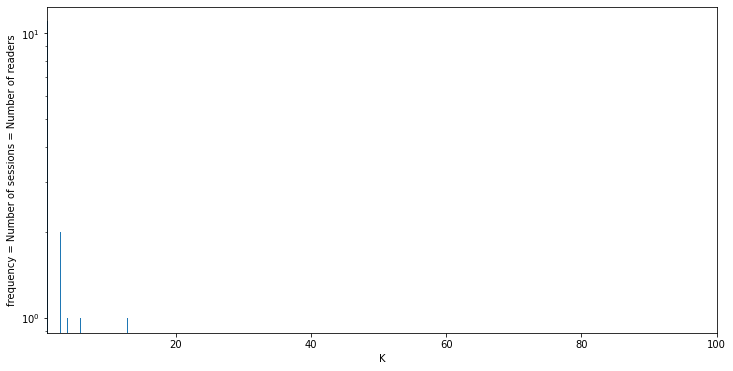

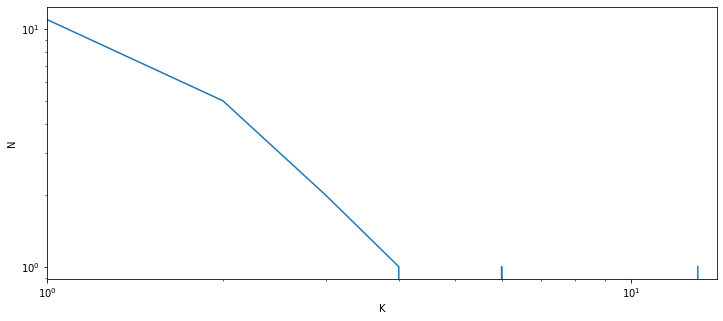

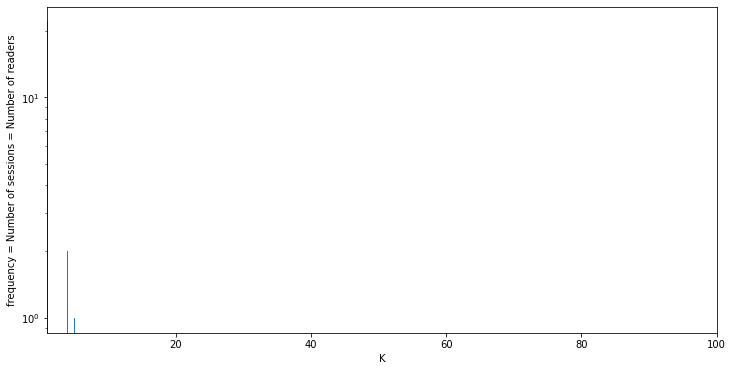

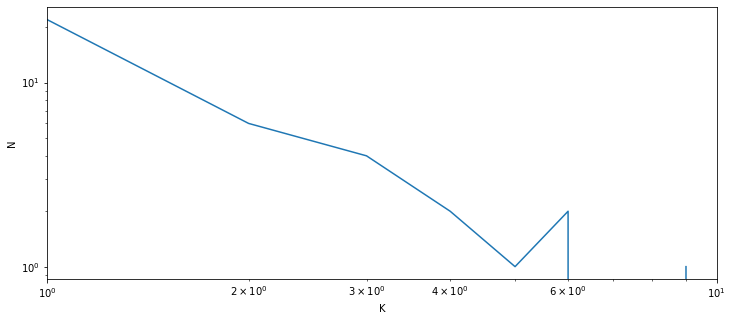

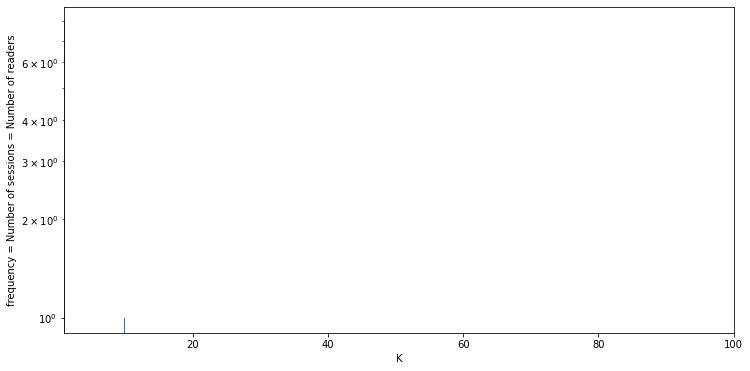

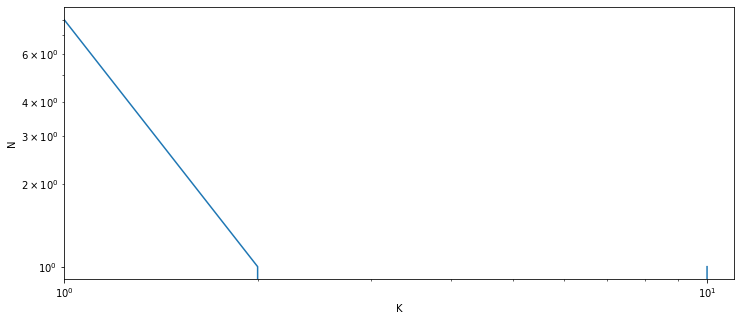

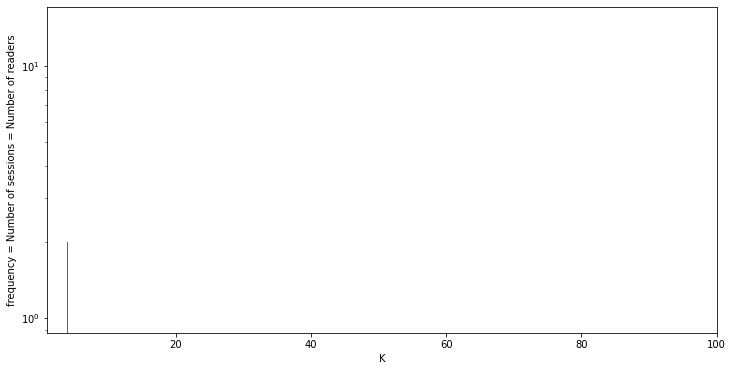

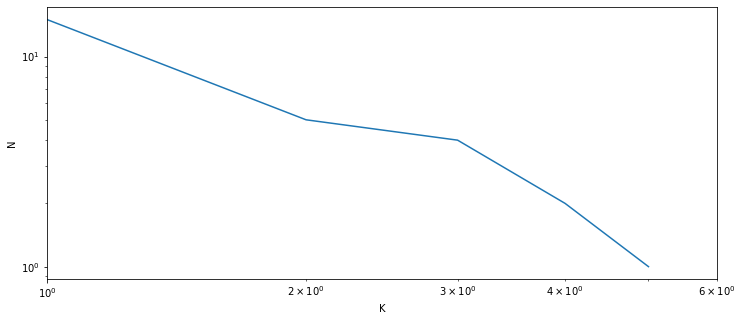

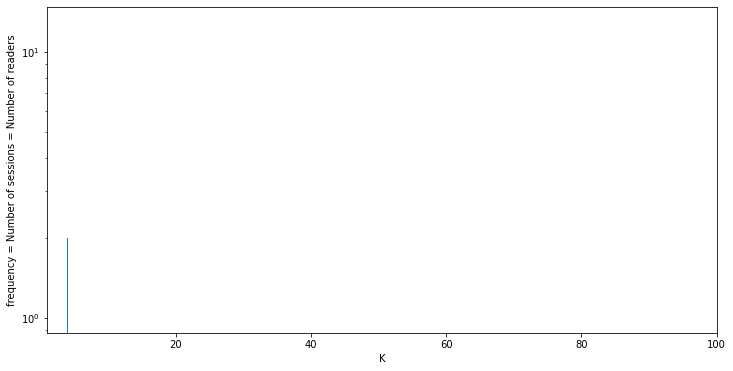

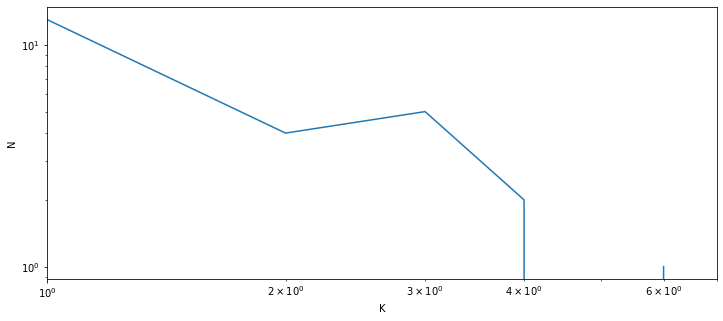

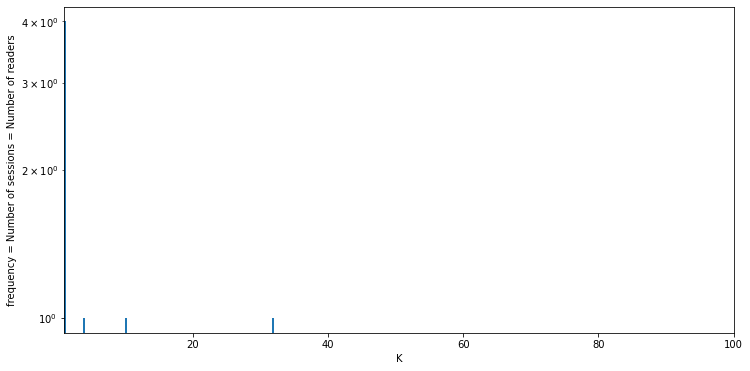

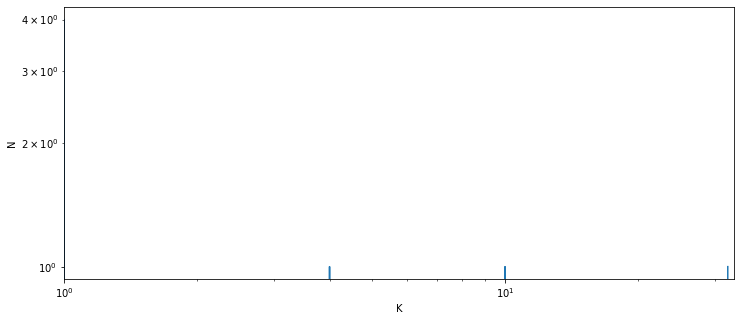

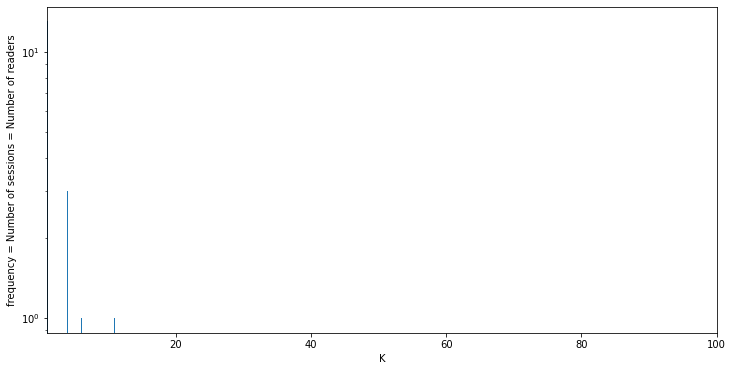

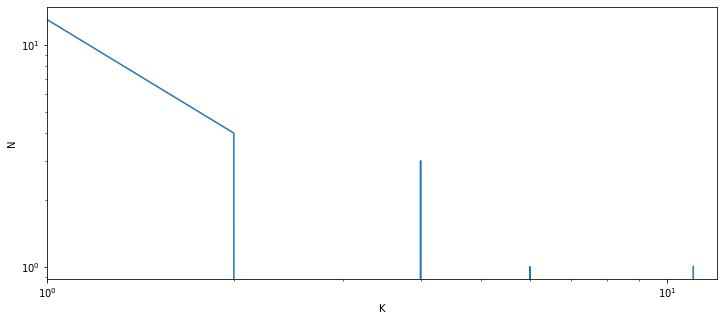

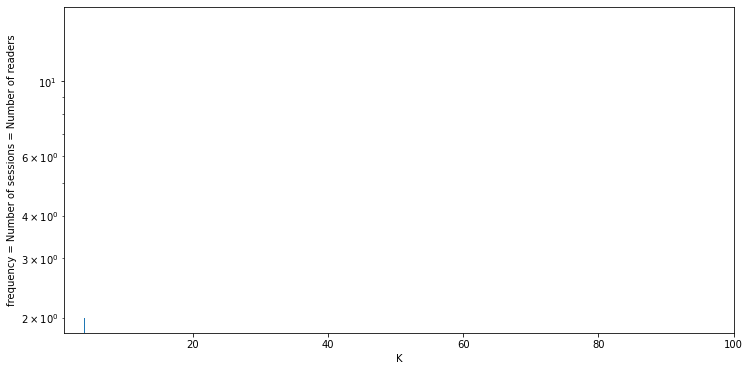

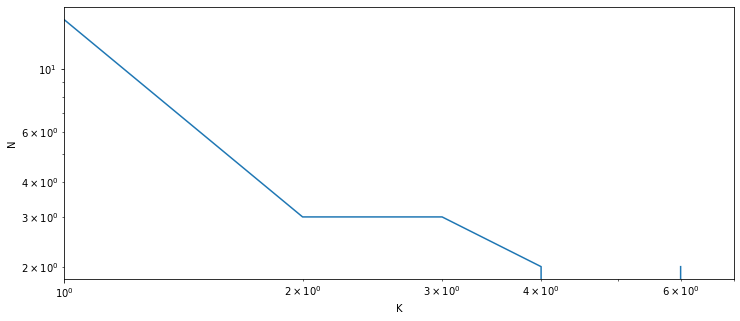

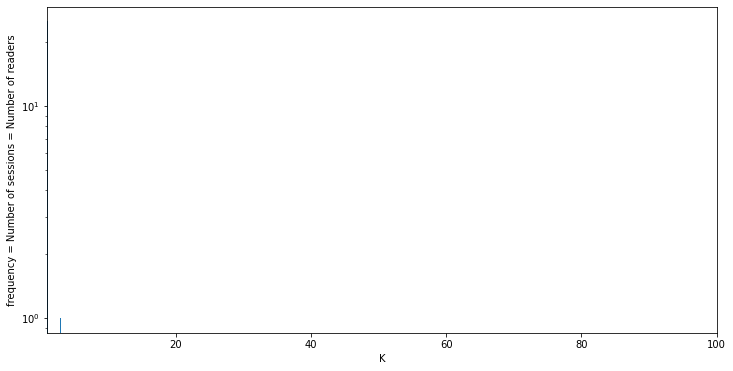

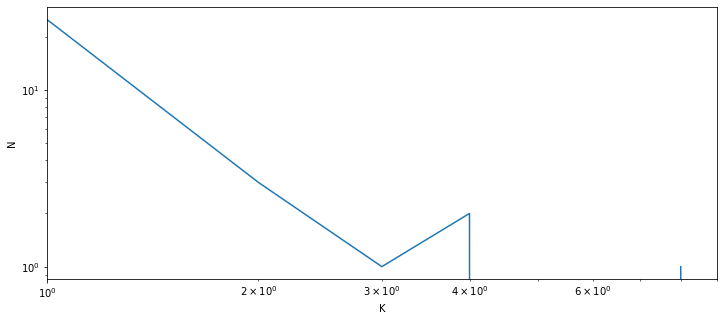

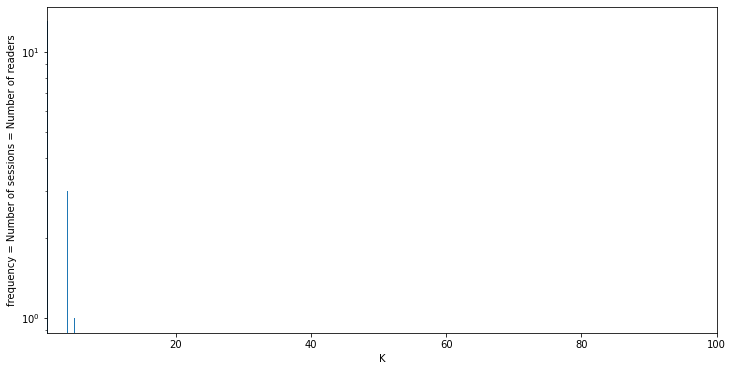

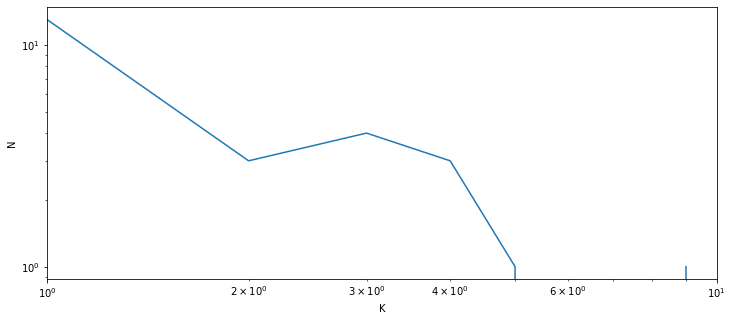

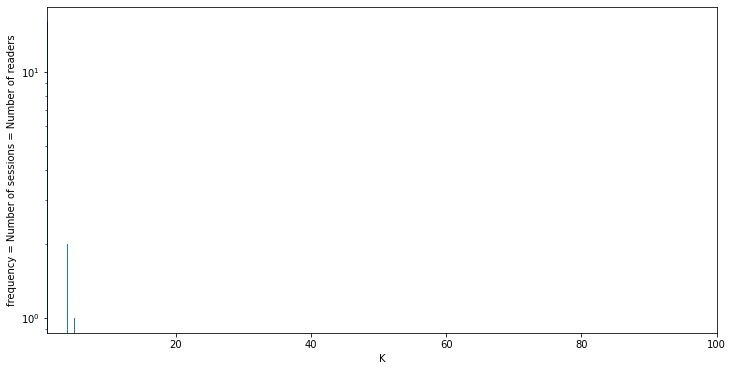

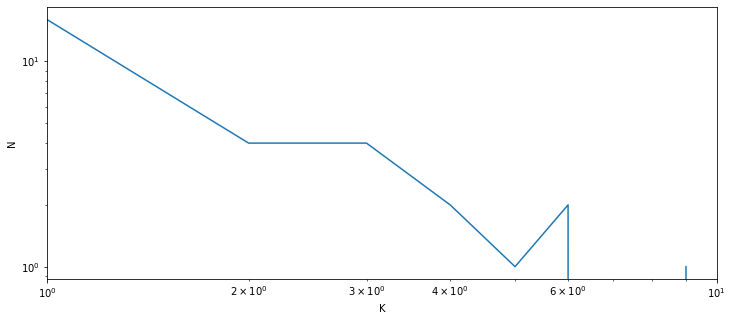

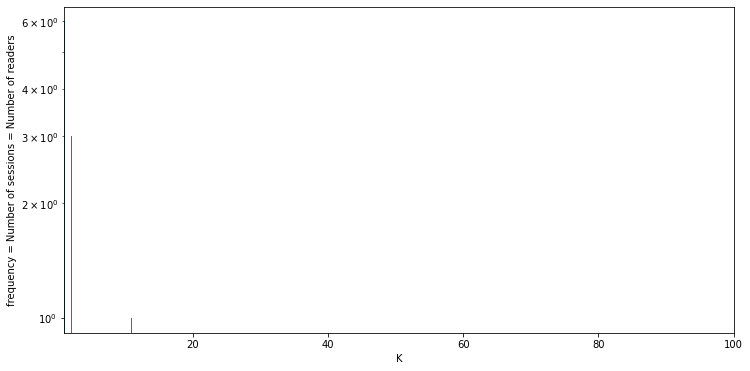

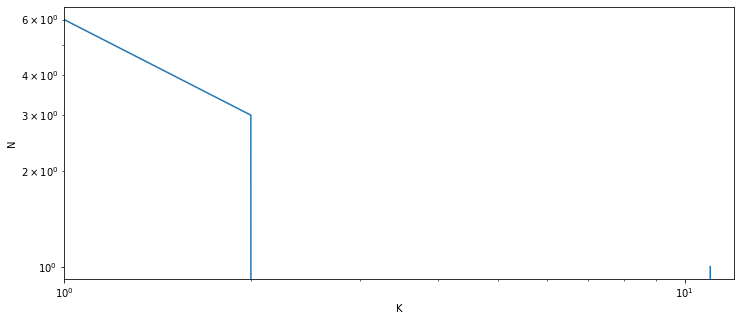

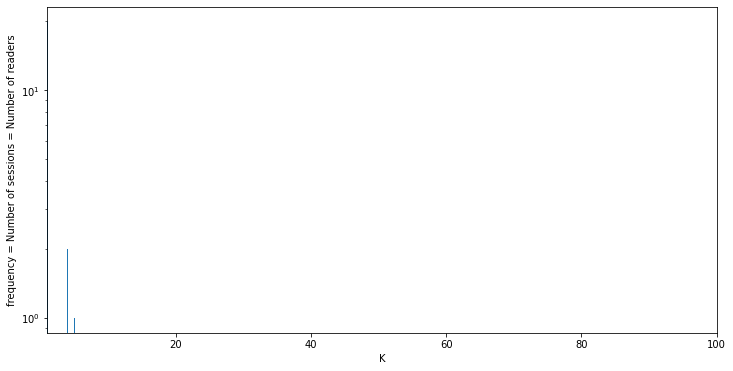

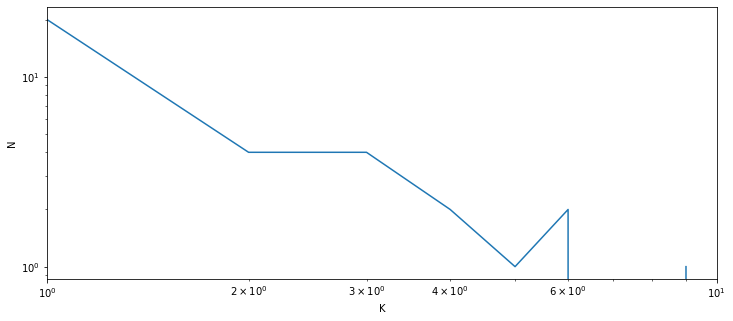

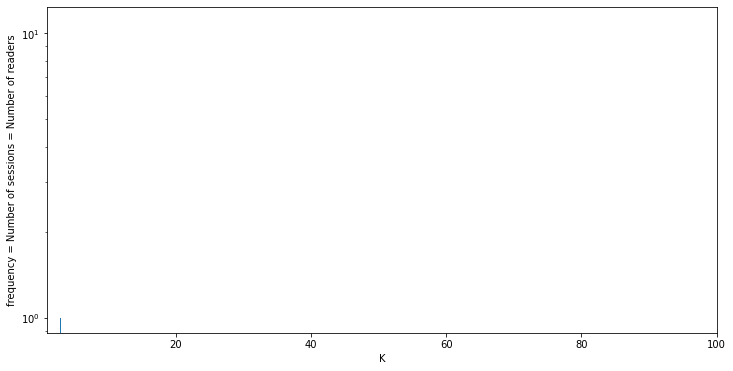

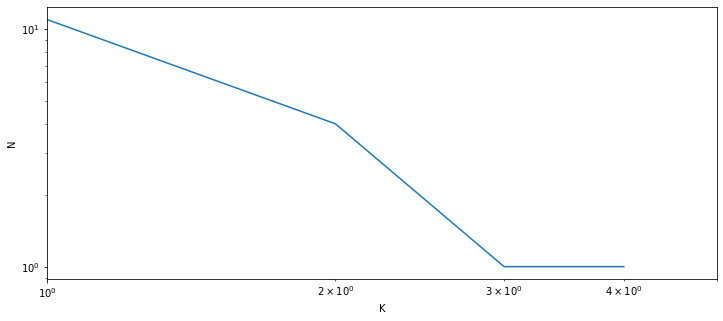

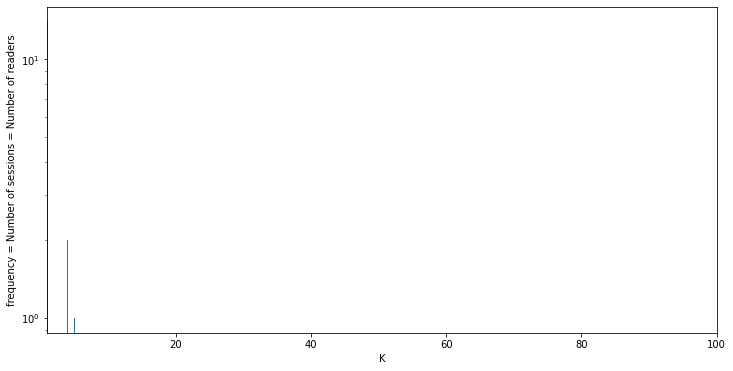

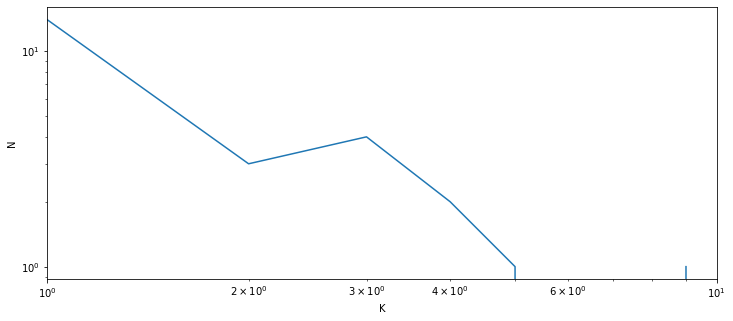

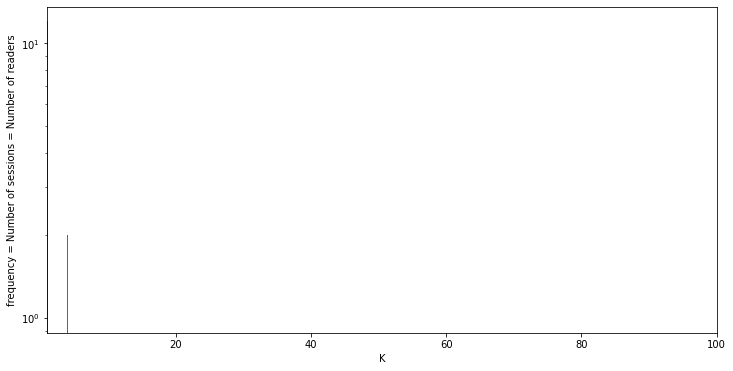

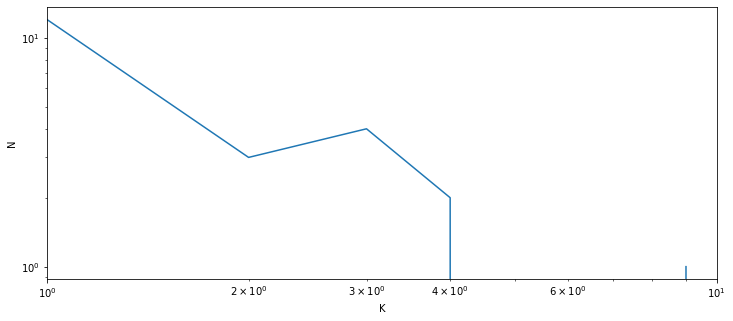

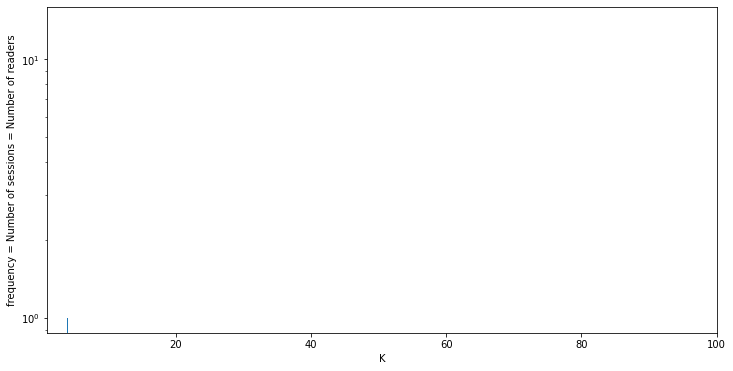

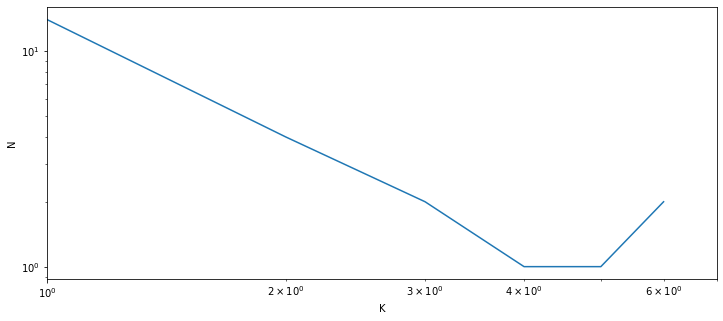

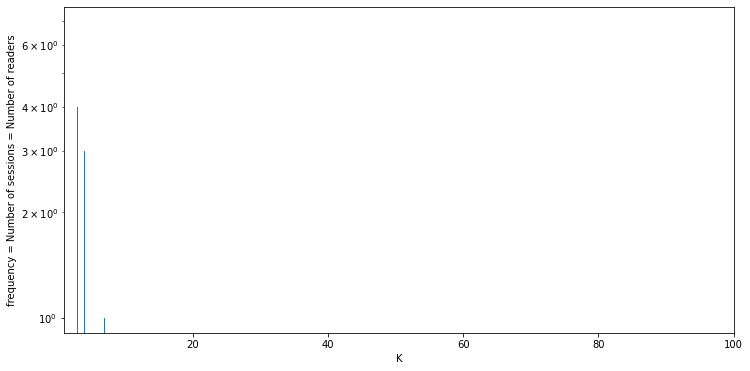

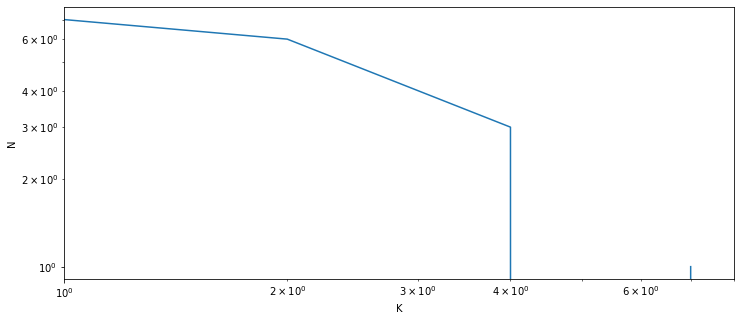

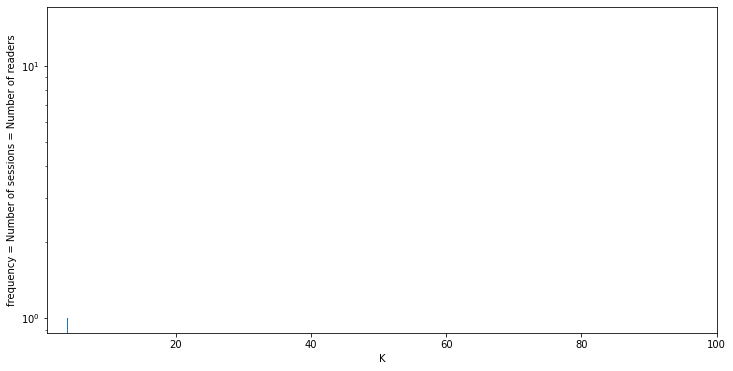

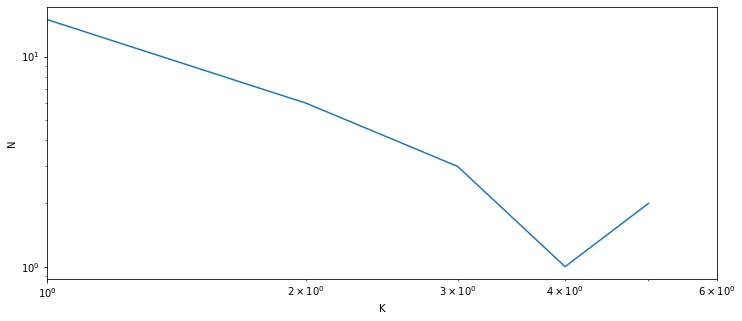

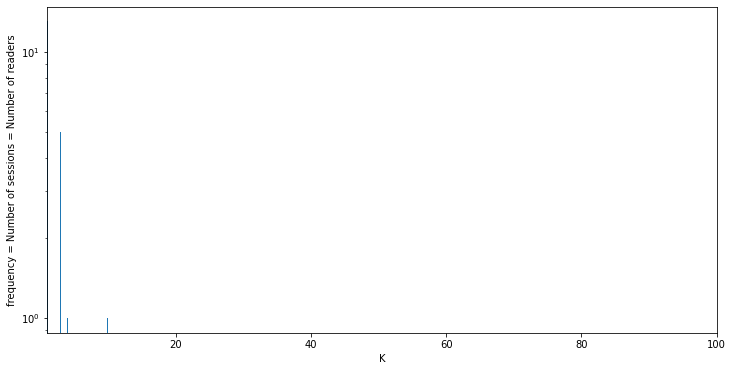

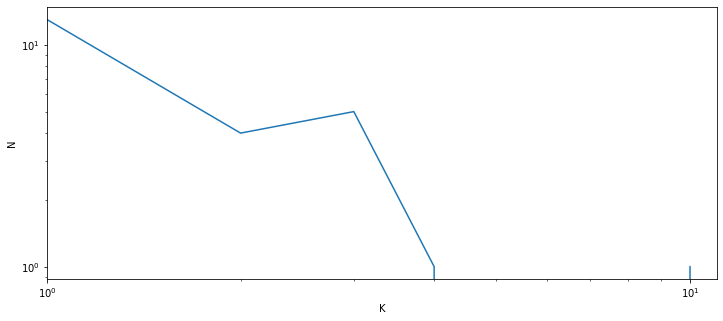

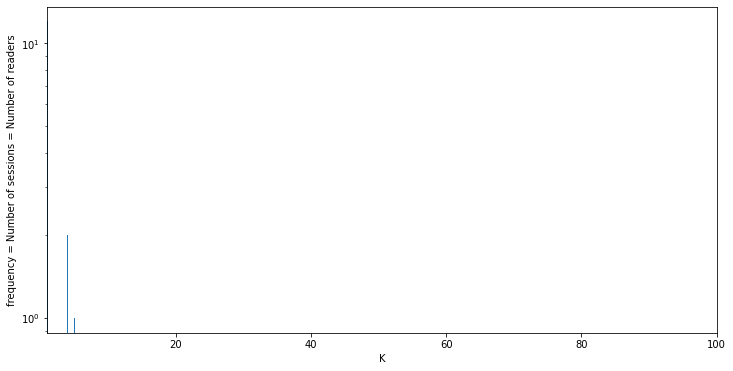

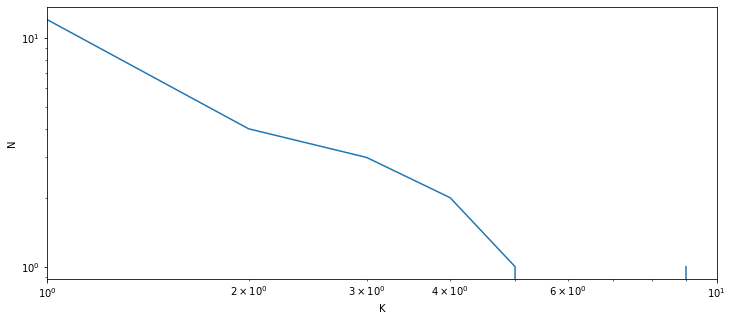

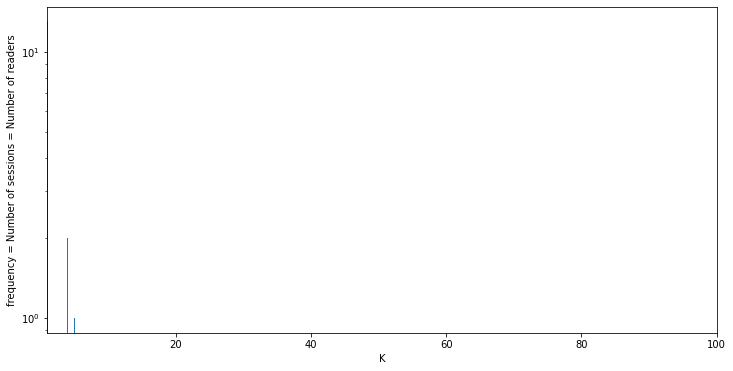

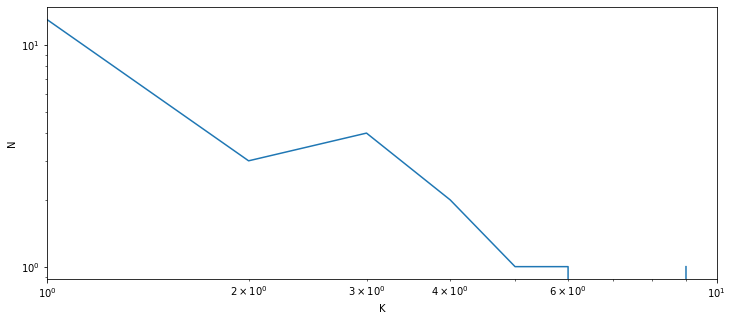

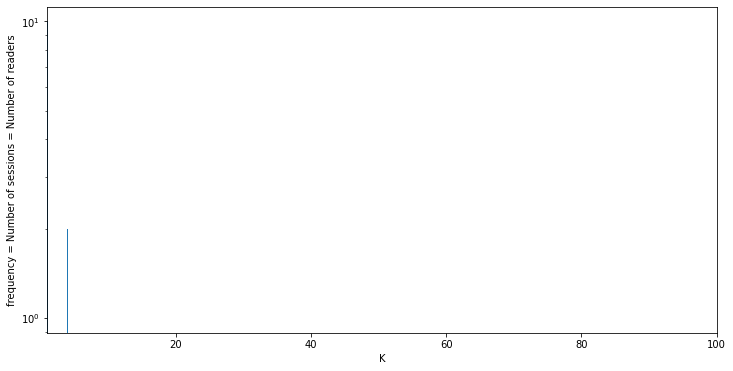

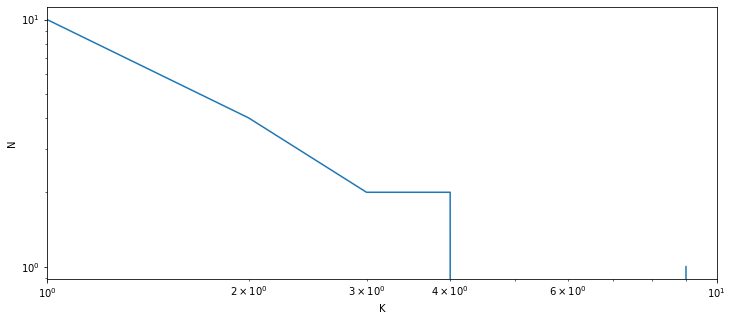

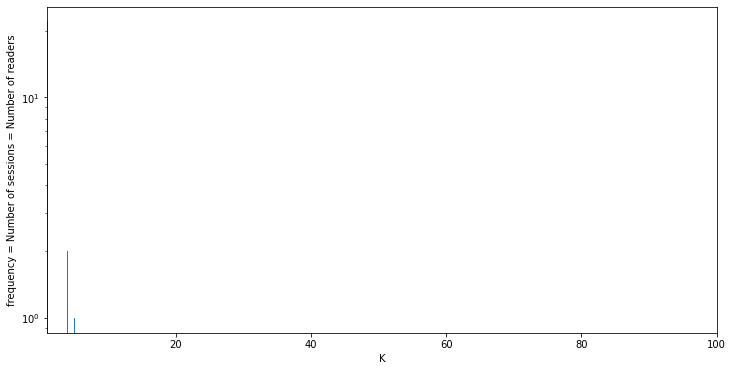

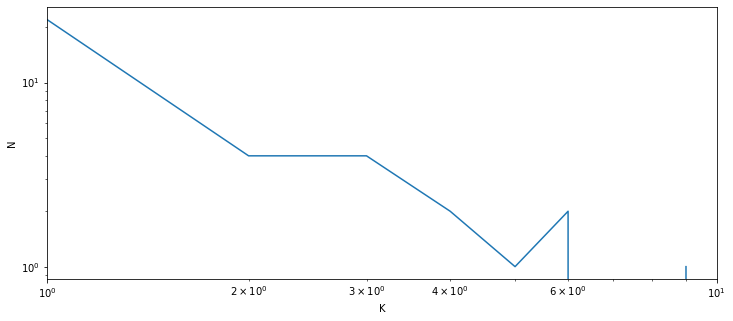

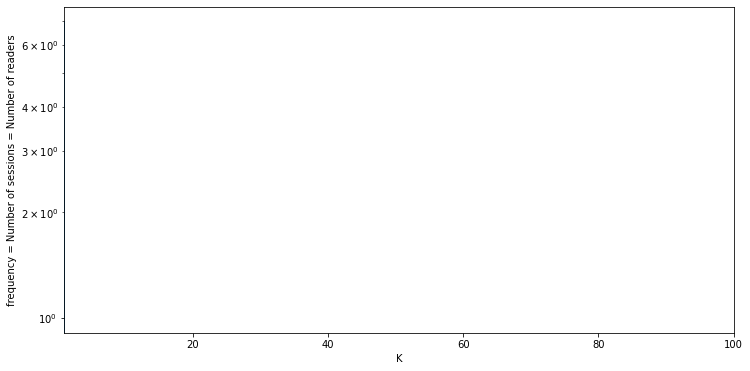

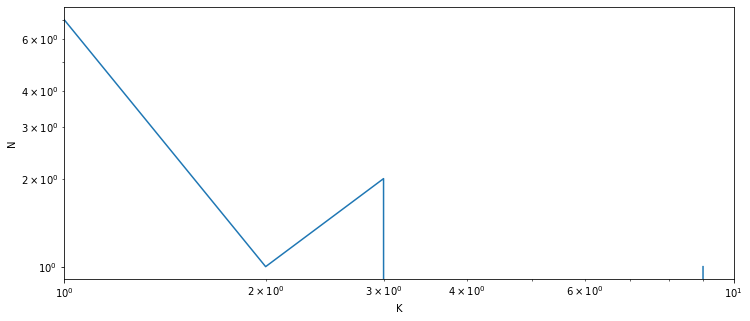

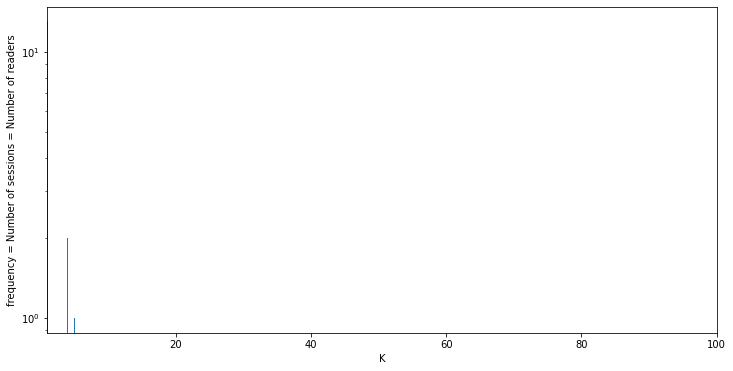

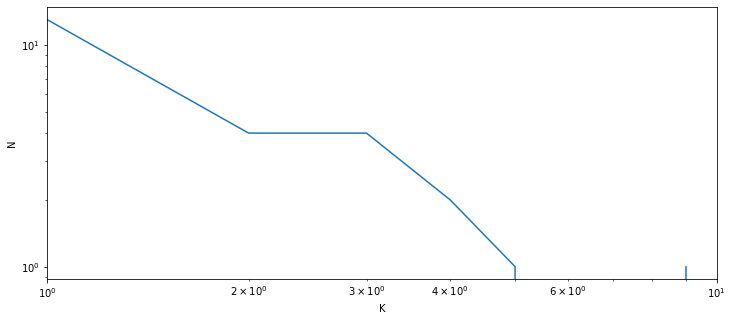

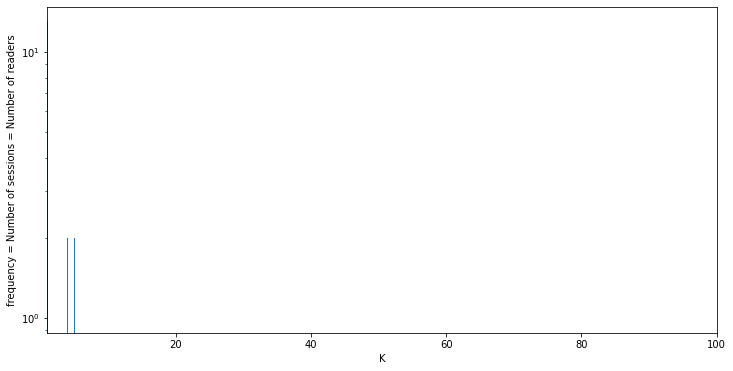

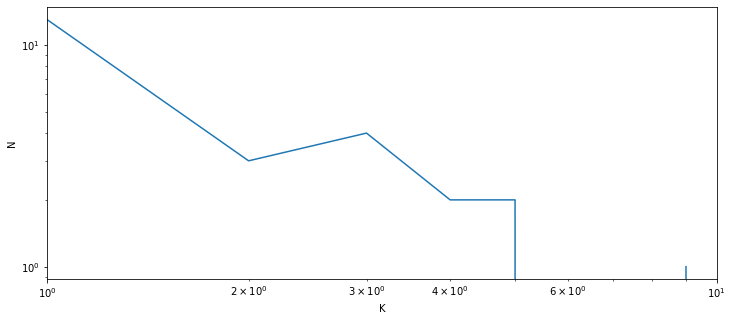

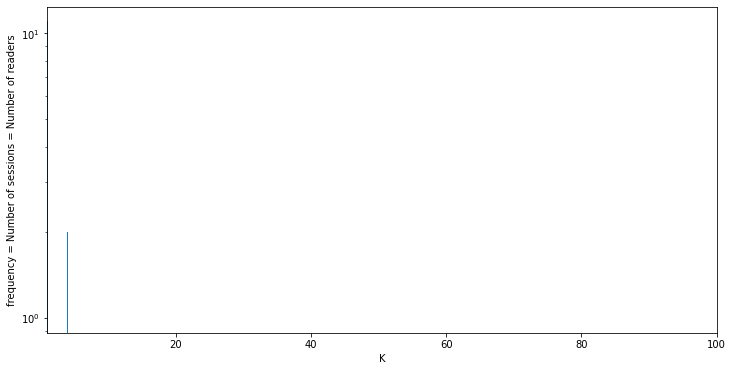

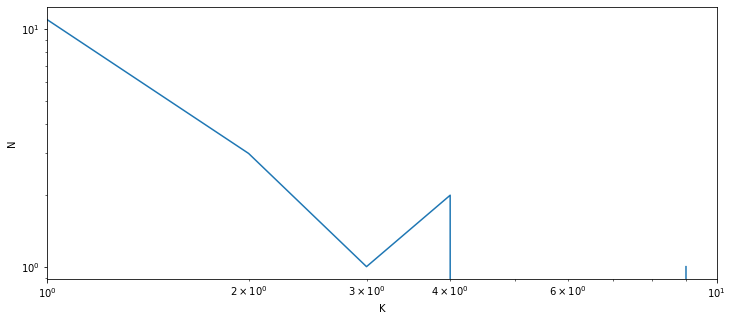

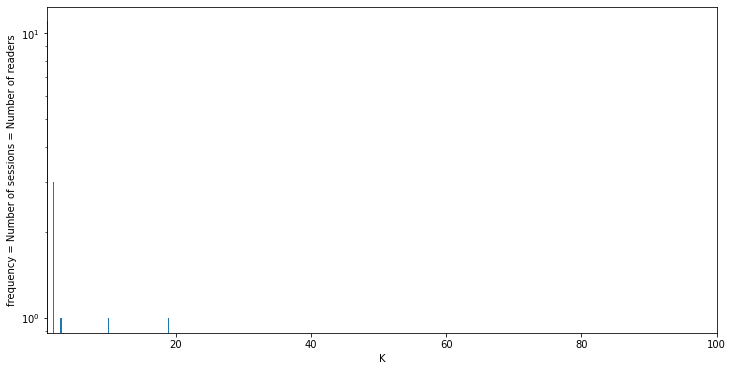

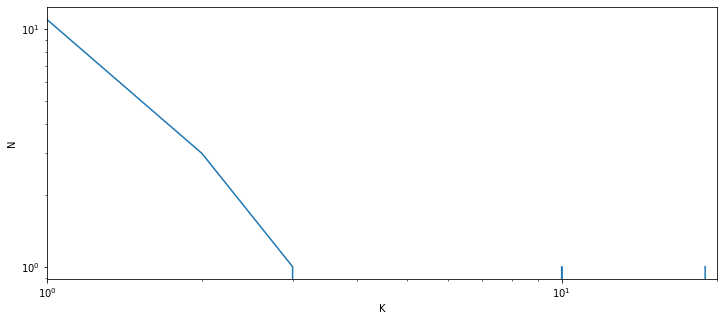

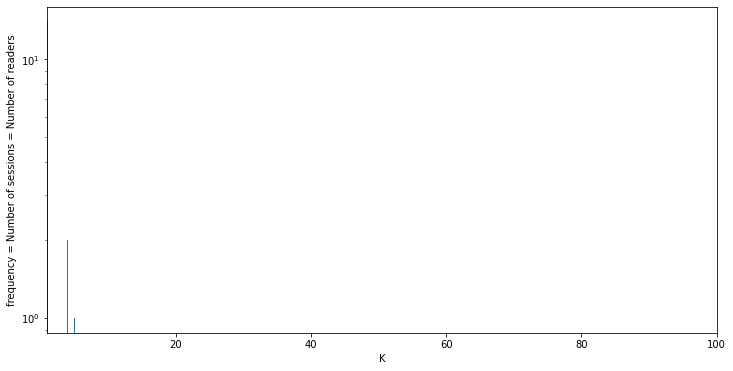

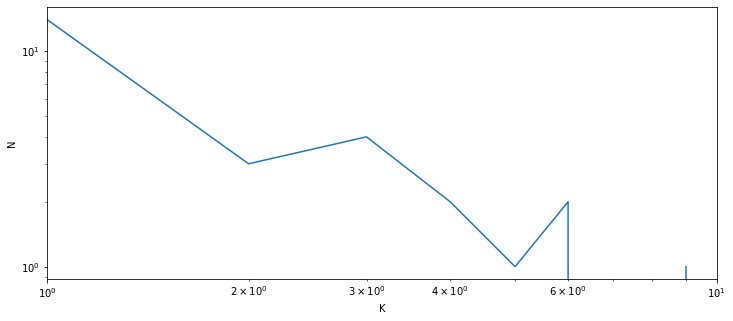

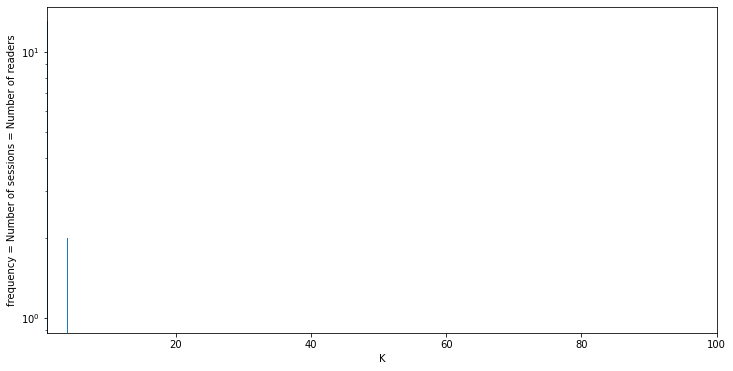

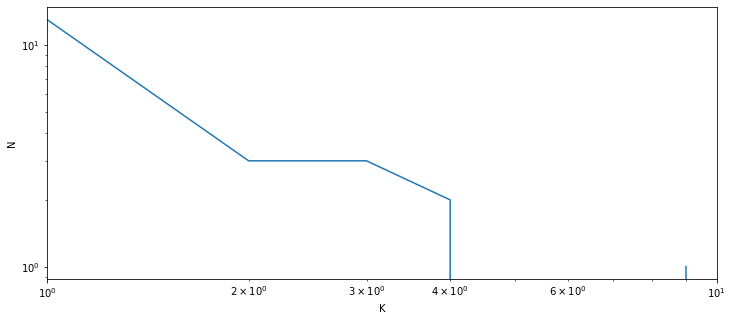

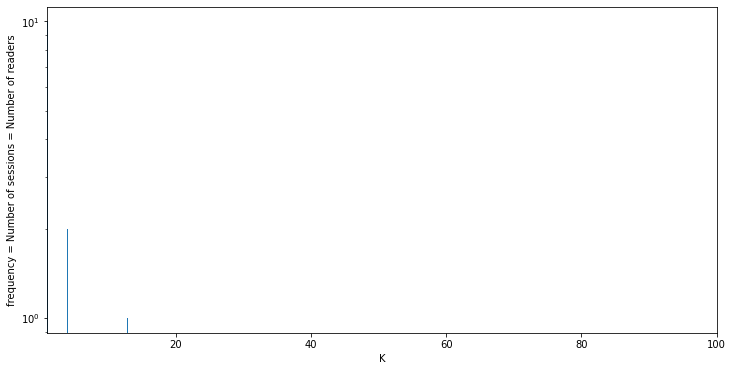

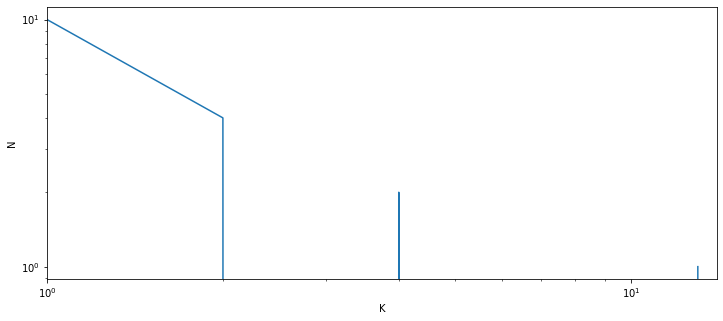

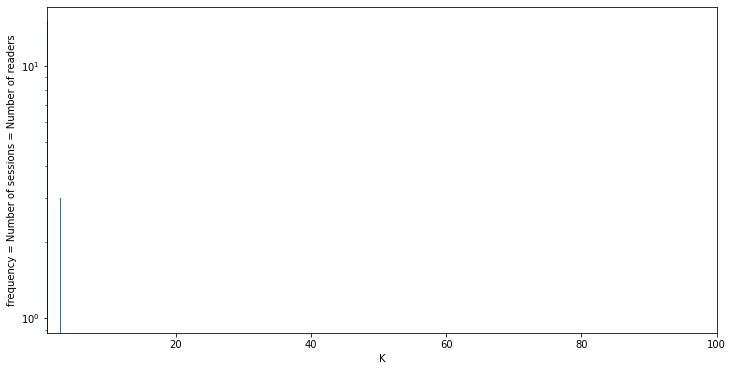

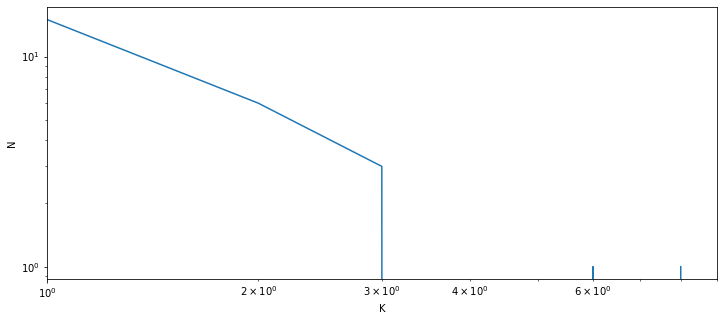

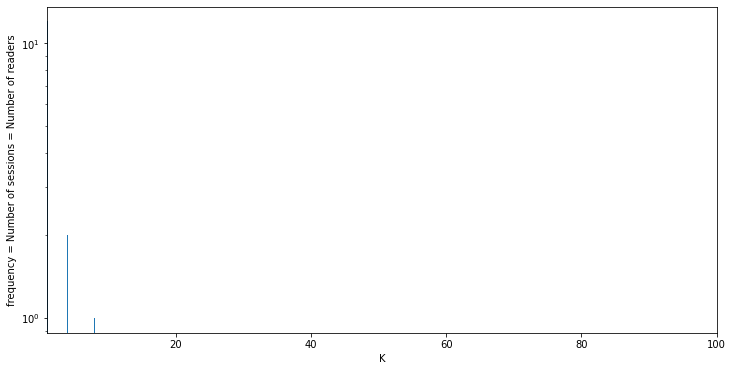

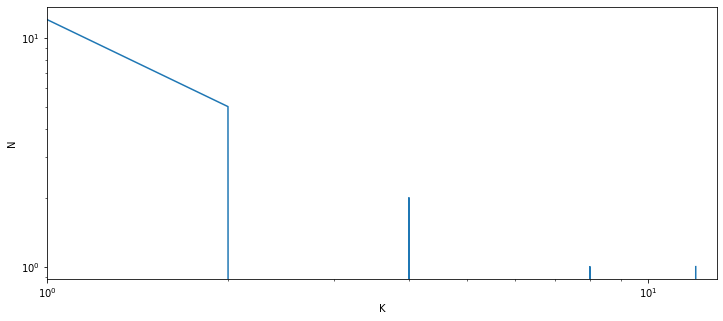

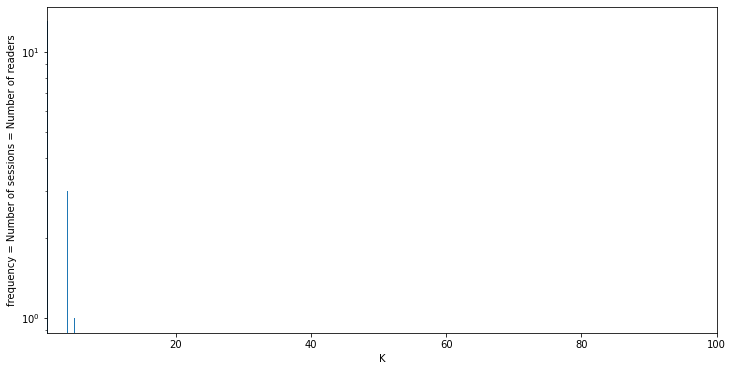

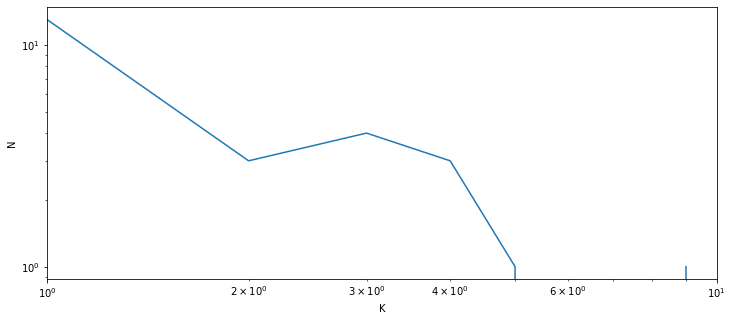

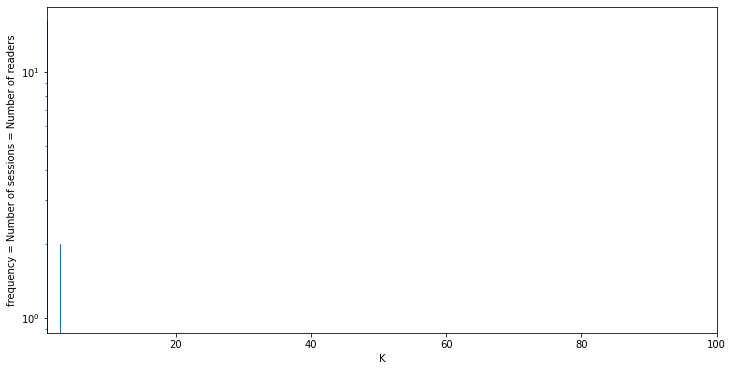

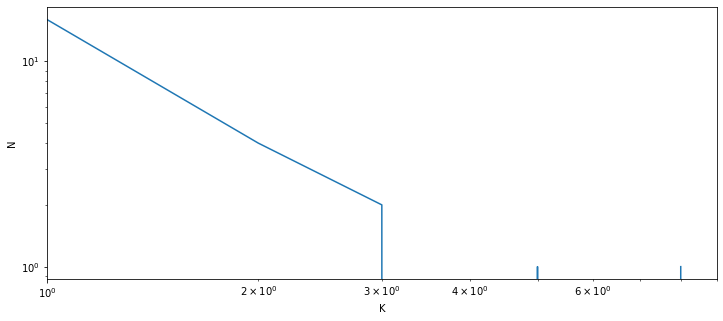

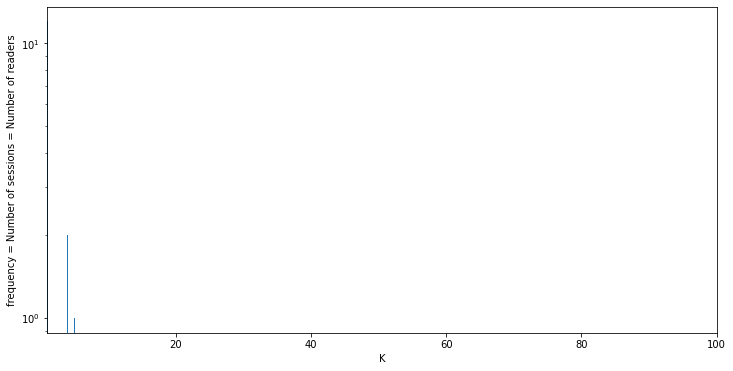

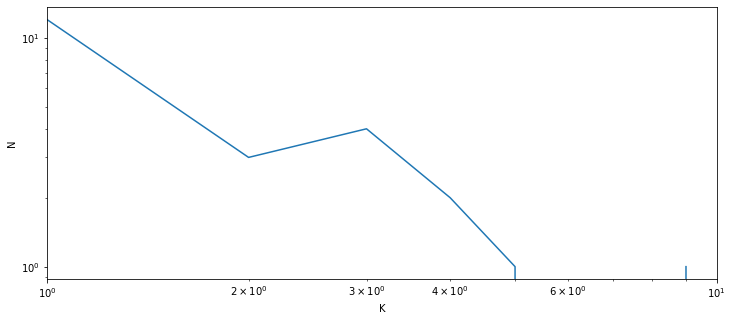

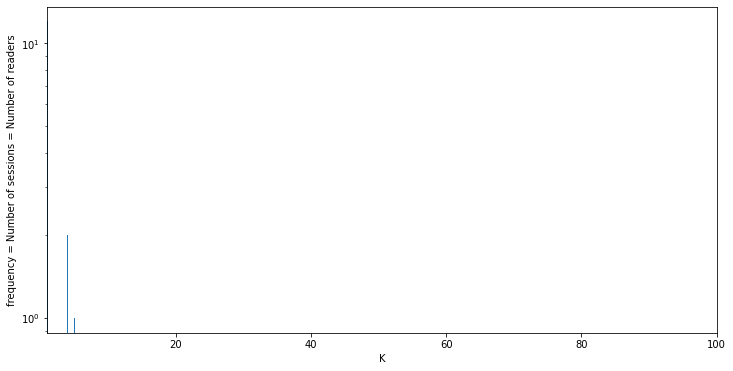

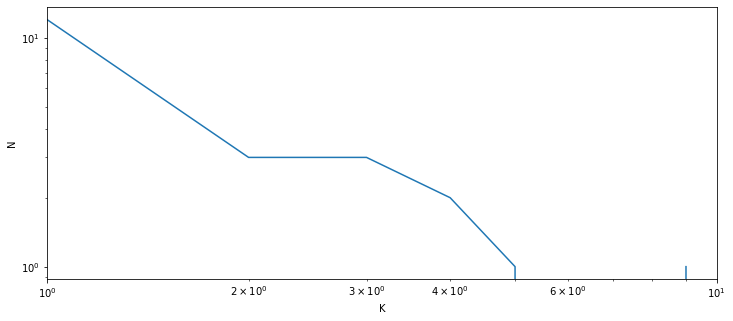

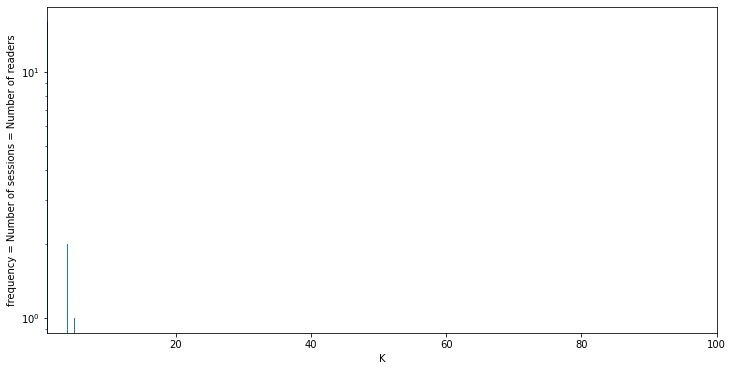

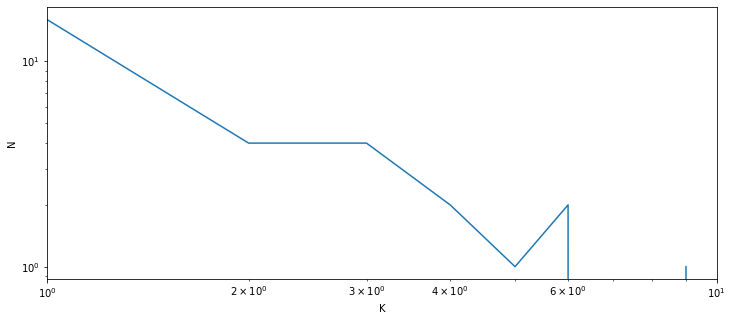

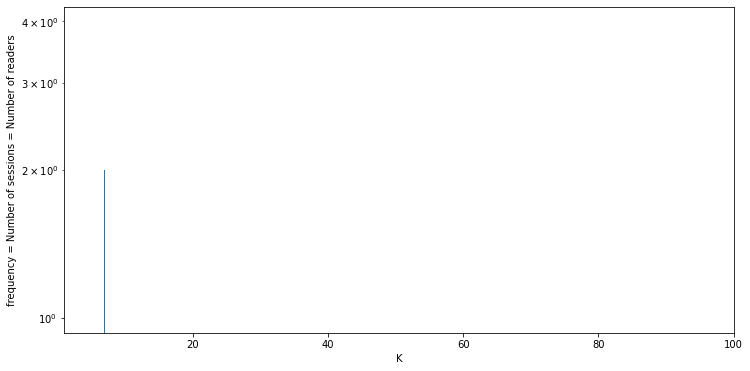

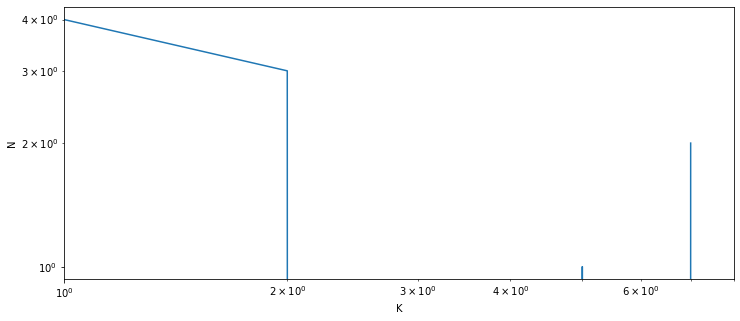

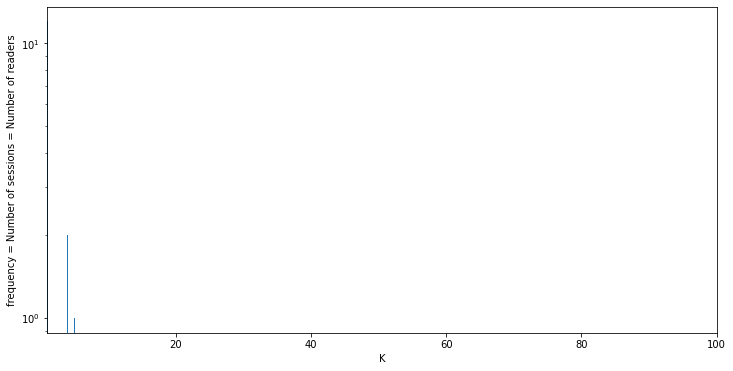

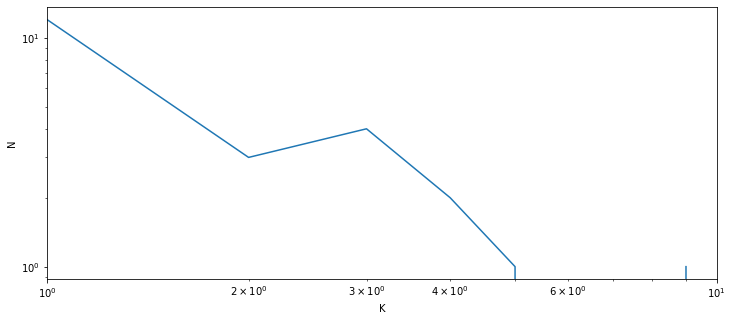

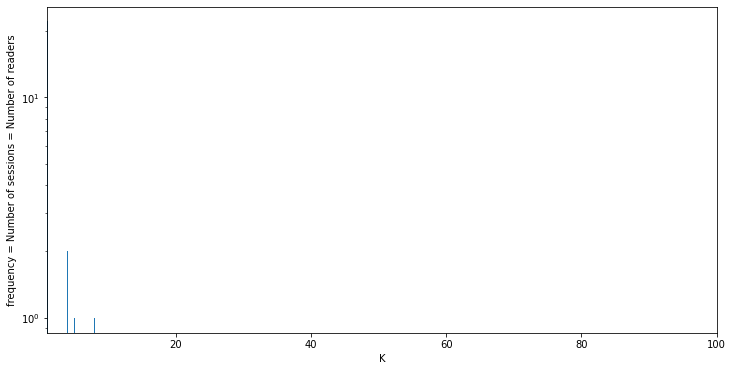

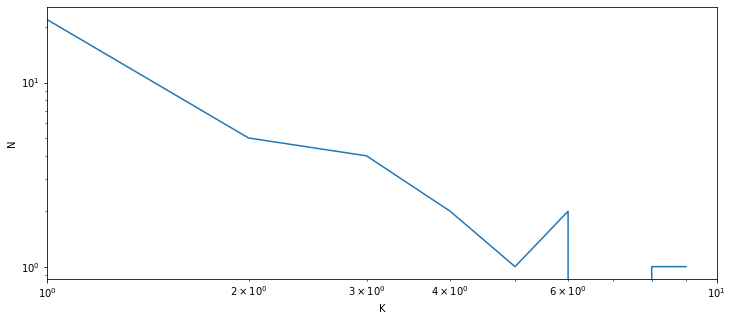

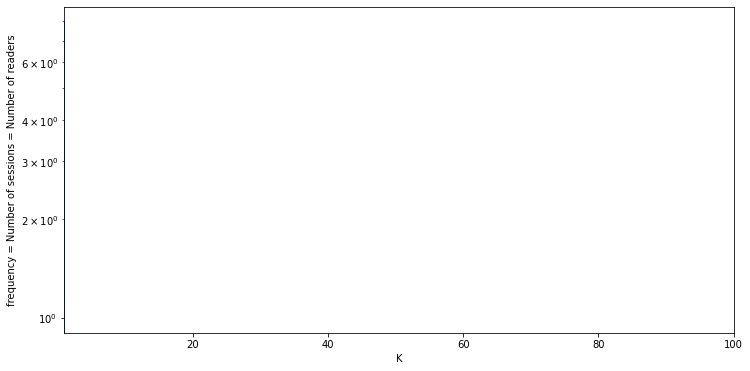

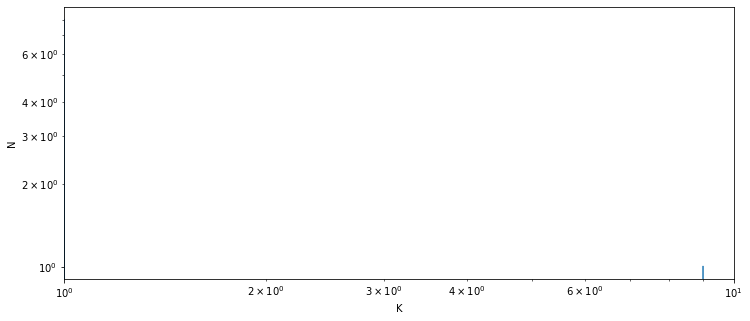

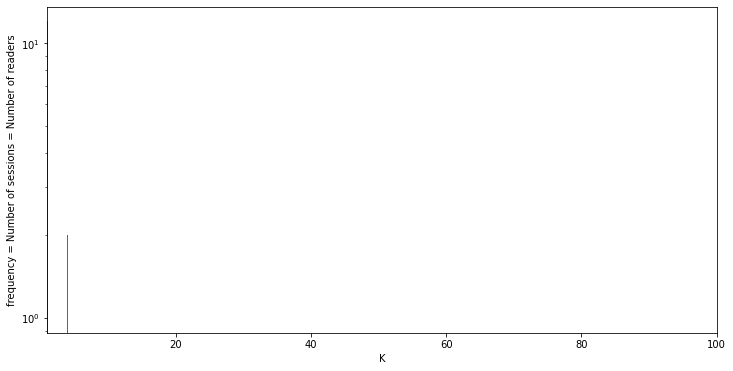

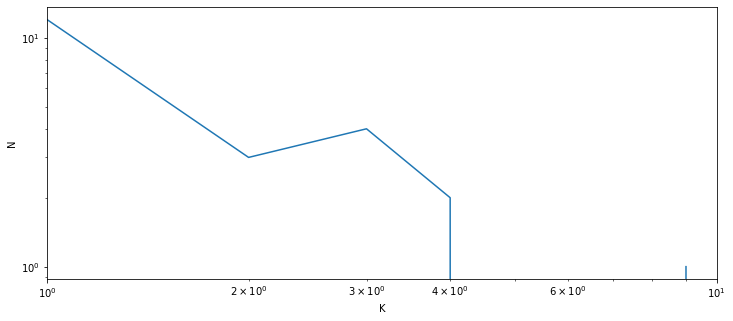

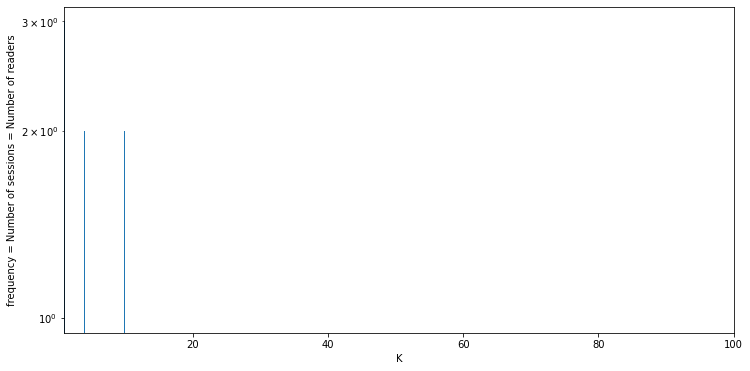

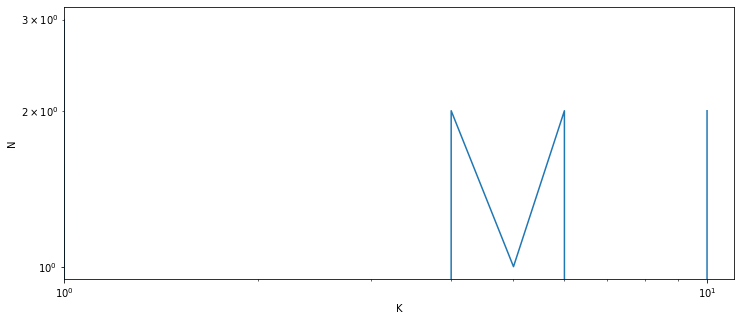

In [176]:
# Affichage des graphes des valeurs de N et K
def afficheK(K):
    plt.figure(figsize=(12,6))
    plt.xlim(1,100)
    plt.xlabel('K')
    plt.ylabel('frequency = Number of sessions = Number of readers')
    plt.hist(K, bins=100, log=True)

def afficheNK(N,K):
    plt.figure(figsize=(12,5))
    plt.ylabel("N")
    plt.xlim(1,np.max(K)+1)
    plt.xlabel("K")
    plt.yscale("log")
    plt.xscale("log")
    plt.plot(N)

indiceBloc=0
for i in range(50):
    afficheK(K[indiceBloc])
    afficheNK(N[indiceBloc],K[indiceBloc])
    indiceBloc +=1

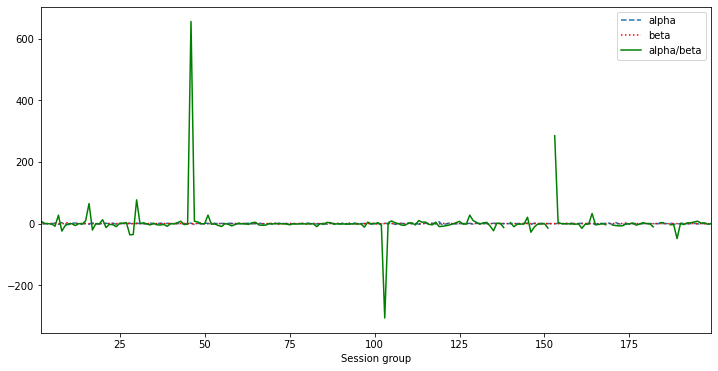

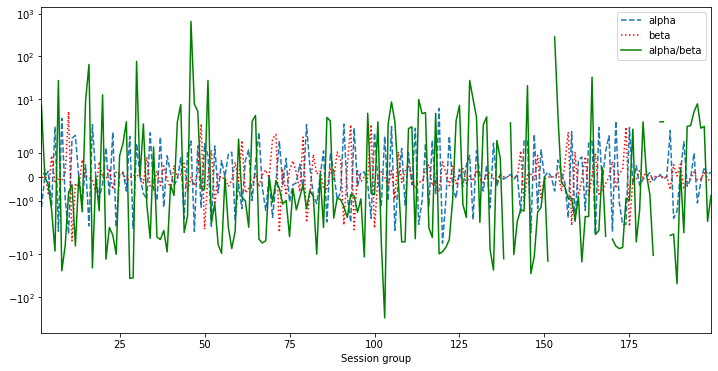

In [178]:
#Calcul des alpha et béta et de leur rapport
#affichage
alpha = [0 for _ in range(len(blocs))]
beta =  [0 for _ in range(len(blocs))]
ratio =  [0 for _ in range(len(blocs))]
for i in range(1,len(blocs)):
    alpha[i] = NMean[i] - NMean[i-1]
    beta[i] = KMean[i] - KMean[i-1]
    if beta[i] != 0 :
        ratio[i] = alpha[i]/beta[i]
    else:
        ratio[i] = math.inf
#print("valeurs de alpha :", alpha)
#print("valeurs de beta : ", beta)

plt.figure(figsize=(12,6))
plt.xlim(2,len(blocs)-1)
plt.xlabel('Session group')
plt.plot(alpha, linestyle='--', label='alpha')
plt.plot(beta, linestyle=':', color='r', label='beta')
plt.plot(ratio, color='g', label='alpha/beta')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(12,6))
plt.xlim(2,len(blocs)-1)
plt.xlabel('Session group')
plt.plot(alpha, linestyle='--', label='alpha')
plt.plot(beta, linestyle=':', color='r', label='beta')
plt.plot(ratio, color='g', label='alpha/beta')
plt.legend(loc='upper right')
plt.yscale('symlog')
plt.show()

In [179]:
#Attribution des types pour chaque bloc de sessions
typeBlocSession = ['NA' for _ in range(len(blocs))]
coeff = 0.5
Nmax = np.max(NMean) - abs(np.max(NMean)-np.min(NMean))*coeff
Nmin = np.min(NMean) + abs(np.max(NMean)-np.min(NMean))*coeff
Kmax = np.max(KMean) - abs(np.max(NMean)-np.min(NMean))*coeff
KMin = np.min(KMean) + abs(np.max(NMean)-np.min(NMean))*coeff
#print("MAX: ", np.max(ratio))
ratioMax = 100
ratio1 = 30
print ("Nmax = {} Nmin = {} KMax = {} KMin = {}, ratioMax = {}".format(Nmax,Nmin,Kmax,KMin, ratioMax))
for i in range(1, len(blocs)):
    #print (NMean[i], KMean[i], ratio[i])
    if NMean[i]>Nmax and KMean[i]>Kmax and abs(ratio[i])>ratioMax:
        typeBlocSession[i]='a'
    elif NMean[i]<Nmin and KMean[i]>Kmax and abs(ratio[i])<ratio1:
        typeBlocSession[i]='b'
    elif NMean[i]<Nmin and KMean[i]<KMin and abs(ratio[i])>ratioMax:
        typeBlocSession[i]='c'
    elif NMean[i]<Nmin and KMean[i]<KMin and abs(ratio[i])<ratio1:
        typeBlocSession[i]='d'
    elif NMean[i]>Nmax and KMean[i]<KMin and abs(ratio[i])>ratioMax:
        typeBlocSession[i]='e'
    elif NMean[i]>Nmax and KMean[i]>Kmax and abs(ratio[i])<ratio1:
        typeBlocSession[i]='f'
typesNb = Counter(typeBlocSession)
print(typesNb)

Nmax = 4.1060606060606055 Nmin = 4.106060606060606 KMax = 3.248917748917749 KMin = 5.293939393939394, ratioMax = 100
Counter({'d': 163, 'NA': 15, 'b': 14, 'c': 7, 'e': 1})


('e', 'd', {'weight': inf})
('d', 'd', {'weight': -2.6617453069507837})
('d', 'b', {'weight': -1.8824328083588475})
('d', 'c', {'weight': inf})
('c', 'c', {'weight': inf})
('b', 'b', {'weight': -1.2283792339661443})


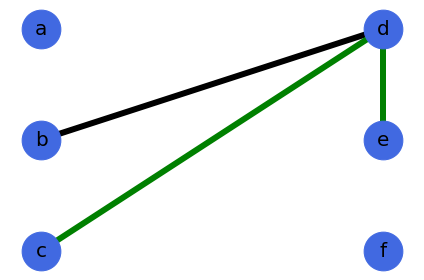

In [181]:
# affichage du graphe
'''Functions to enumerate all perfect and maximum matchings in bipartited graph.

NOTICE: We would like to develop a bipartite graph that can be placed in our paper.


Author: Otmane Azeroual
Update time: 2020-12-11 18:41:56.
'''



#--------Import modules-------------------------
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import bipartite
from networkx.algorithms.bipartite import hopcroft_karp_matching

data = pd.DataFrame(
    {'domain': ["c", "b", "a"],
     'subdomain': ["f", "e", "d"]})

B = nx.Graph()
B.add_nodes_from(data['subdomain'], bipartite=0)
B.add_nodes_from(data['domain'], bipartite=1)

''' :::::::::::::::::::'''
''' Ajout P. Bellot pour récupérer les types de session identifiés '''
for i in range(0, len(blocs)-1):
    if typeBlocSession[i] != 'NA' and typeBlocSession[i+1] != 'NA':
        B.add_edge(typeBlocSession[i], typeBlocSession[i+1], weight=ratio[i]+ratio[i+1])
''' :::::::::::::::::::'''

edge_to_count = dict()
for edge in B.edges():
    try:
        edge_to_count[edge] += 1
    except KeyError:
        edge_to_count[edge] = 1

pos = nx.spring_layout(B)

for edge in B.edges(data=True): print(edge)

elarge = [(u, v) for (u, v, d) in B.edges(data=True) if d["weight"] <= 12] #black
exlarge = [(u, v) for (u, v, d) in B.edges(data=True) if d["weight"] > 12 and d["weight"] < 33] #red
esmall = [(u, v) for (u, v, d) in B.edges(data=True) if d["weight"] >= 33] #green

pos = {node:[0, i] for i,node in enumerate(data['domain'])}
pos.update({node:[1, i] for i,node in enumerate(data['subdomain'])})

nx.draw_networkx_edge_labels(B, pos, edge_to_count, label_pos=1)

#nx.draw_networkx_nodes(B, pos, node_size=1500, node_color="royalblue", with_labels=False)
nx.draw_networkx_nodes(B, pos, node_size=1500, node_color="royalblue")

nx.draw_networkx_edges(B, pos, edgelist=elarge, width=6)

nx.draw_networkx_edges(B, pos, edgelist=exlarge, width=6, edge_color="r", style="solid")
nx.draw_networkx_edges(B, pos, edgelist=esmall, width=6, edge_color="g", style="solid")

nx.draw_networkx_labels(B, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.tight_layout()
plt.show()

# =======================================================================================
# !!! Expérience qui  ne correspond pas aux définitions de N et K finalement retenues
# =======================================================================================

# Estimation des valeurs de N et K pour chaque article lu, a posteriori
# N désigne le nombre de lecteurs qui ont lu l'article
# K désigne un nombre d'articles proposés au lecteur. Ici K est défini de manière aléatoire
num_session = -1
import random
indice_N_sessions = [[] for _ in range(nombre_sessions_graphe)]
indice_K_sessions = [[] for _ in range(nombre_sessions_graphe)]
for ind in data.index:
    url_lue = data['id_url'][ind]
    num_step = data['num_step_in_session'][ind] - 1
    if data['num_step_in_session'][ind] > 1:
        if data['num_step_in_session'][ind] == 2:
            num_session += 1
            sigma = random.randint(1,50)
            mu = random.randint(1,500)
            #print("session ", num_session, " num_step : ", data['num_step_in_session'][ind], " ajout de : ", [graph.nodes[url_precedente]['nb']], " pour l'URL précédente : ", url_precedente)
            indice_N_sessions[num_session].append(graph.nodes[url_precedente]['nb'])
            indice_K_sessions[num_session].append(int(abs(random.gauss(mu,sigma))))
        #print("session ", num_session, " num_step : ", data['num_step_in_session'][ind], " ajout de : ", [graph.nodes[url_lue]['nb']], " pour l'URL : ", url_lue)
        indice_N_sessions[num_session].append(graph.nodes[url_lue]['nb'])
        indice_K_sessions[num_session].append(int(abs(random.gauss(mu,sigma))))
    url_precedente = url_lue
print(indice_N_sessions)
print(indice_K_sessions)